In [1]:
from typing import List, Dict

from oop_functions.experiment_helper import *
from oop_functions.experiment_runner import ExperimentRunner
from oop_functions.util_functions import *
from oop_functions.visualization_util import *
from oop_functions.analytics_cv_util import *
from oop_functions.analytics_utils import *

%matplotlib inline
import warnings

warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns

from xgboost import XGBClassifier

import itertools


In [2]:
filesuffixes = [
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_single_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_35_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_not_screened_cols_single_label_top_50_features_XGBClassifier_cancer_in_next_1_years__15_trials',
    ]

In [3]:
filesuffixes = [
    '_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_3_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_5_years__15_trials',
    '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_10_years__15_trials',
    '_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_ovar_cancer__15_trials',
    '_for_experiment_participants_all_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # TODO: either don't use these or make them single label
    # '_for_experiment_participants_screened_first_5_ca125_and_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',
    # '_for_experiment_participants_screened_first_5_ca125_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials',
]

In [4]:
# filesuffixes = [
#     '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_balanced_cancer_in_next_1_years__15_trials',
#     '_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials',
# ]

In [5]:
cv_analytics_utils = commonized_datasets(filesuffixes)

_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_trials
Added new records: 0
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
Added new records: 190
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_3_years__15_trials
Added new records: 181
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_5_years__15_trials
Added new records: 208
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_10_years__15_trials
Added new records: 188
_for_experiment_participants_screened_first_5_RandomForestClassifier_

X-axis -1 means that somewhere withing the next year person gets cancer. -2 means somewhere between year -1 and 0 person gets cancer.

While for patients who developed cancer, we alligned them by the year when they got cancer. So, what I did is that I looked at the people who got cancer within the first 5 years of the experiment and who got cancer within that period. I aligned them on the year they got cancer and calculated the average estimated probability of them getting cancer as predicted by model 1 year before actually getting cancer, 2 years before actually getting cancer and so on. This is what the result I got based on the dataset with questionnaire and screening data:

There is an interesting correlation, and we can see that the increase in the probability is non-linear. (I also included the standard deviation interval). On the other hand, the graph based on the same selection of individuals, but only using the questionnaire data, did not exhibit such characteristics:

For the individuals who did not develop cancer, they were alligned by the date of their last exam. Just to verify if there is no fluke, I tested this also on a general population and there is no correlation (they are just aligned based on the last observation)



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.99928   | 5.65785e-05 | 0.999197 | 0.999405 |
| recall__class_0    | 0.999833  | 0.000203386 | 0.999395 | 1        |
| f1-score__class_0  | 0.999556  | 0.000108232 | 0.999344 | 0.999655 |
| precision__class_1 | 0.2       | 0.368394    | 0        | 1        |
| recall__class_1    | 0.0345238 | 0.0594046   | 0        | 0.142857 |
| f1-score__class_1  | 0.0577778 | 0.0993098   | 0        | 0.222222 |
| accuracy           | 0.999113  | 0.000216263 | 0.998689 | 0.99931  |
| auc                | 0.812484  | 0.124762    | 0.500702 | 0.971001 |
+--------------------+-----------+-------------+----------+----------+
_for_experiment_participants_screened_ca125_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


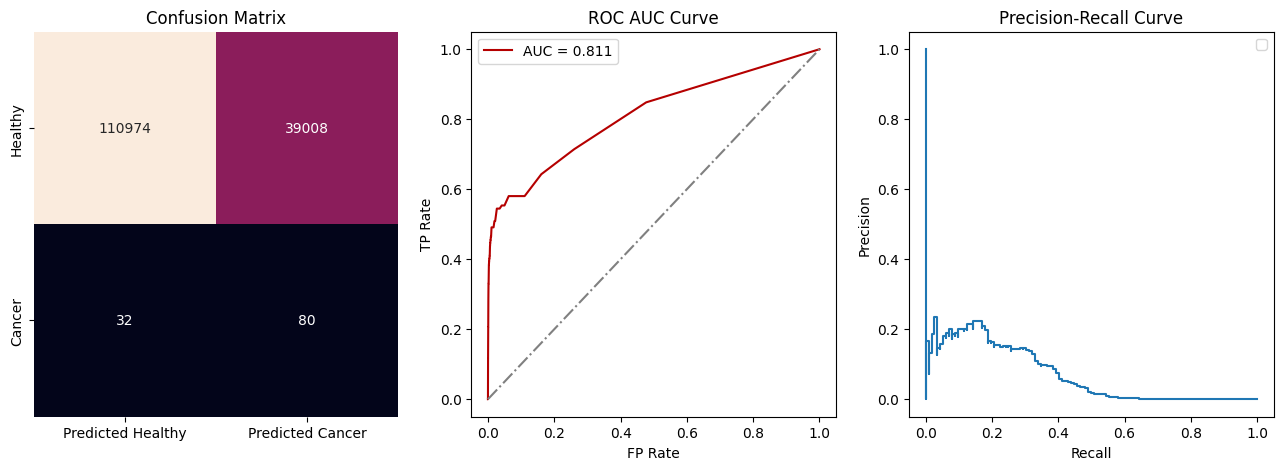

+---------------------------+---------+------------+------------+-------+------------+------------+------------+-----------+
|                           |   count |       mean |        std |   min |        25% |        50% |        75% |       max |
|---------------------------+---------+------------+------------+-------+------------+------------+------------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.00541667 | 0.00924748 |     0 | 0          | 0.00166667 | 0.005      | 0.0266667 |
| cancer_in_next_1_years_-5 |      20 | 0.00583333 | 0.00954368 |     0 | 0          | 0.00333333 | 0.00666667 | 0.0366667 |
| cancer_in_next_1_years_-4 |      36 | 0.00277778 | 0.00394405 |     0 | 0          | 0          | 0.00333333 | 0.0133333 |
| cancer_in_next_1_years_-3 |      51 | 0.0196078  | 0.0810395  |     0 | 0          | 0          | 0.005      | 0.47      |
| cancer_in_next_1_years_-2 |      75 | 0.0186667  | 0.0719213  |     0 | 0          | 0.00333333 | 0.00833333 | 0.48      |


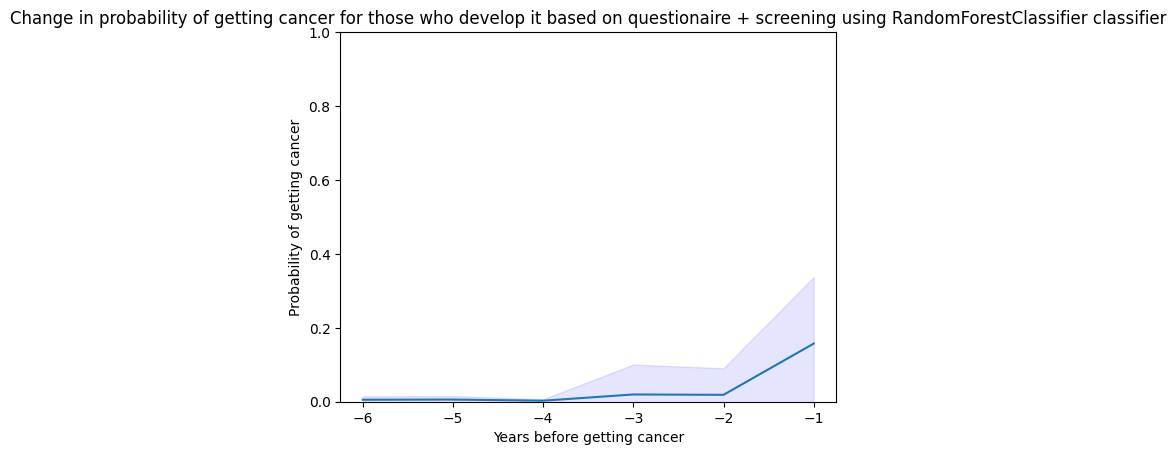

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00536732 | 0.0171555 |     0 |     0 |     0 | 0.00666667 | 0.533333 |
| cancer_in_next_1_years_-5 |   22319 | 0.00546007 | 0.0185619 |     0 |     0 |     0 | 0.00666667 | 0.61     |
| cancer_in_next_1_years_-4 |   25070 | 0.005737   | 0.0191551 |     0 |     0 |     0 | 0.00666667 | 0.656667 |
| cancer_in_next_1_years_-3 |   26219 | 0.00609533 | 0.0210694 |     0 |     0 |     0 | 0.00666667 | 0.6      |
| cancer_in_next_1_years_-2 |   24683 | 0.00614026 | 0.0207809 |     0 |     0 |     0 | 0.00666667 | 0.676667 |
| cancer_in_next_1_years_-1 |   30552 | 0.00730841 | 0.0277209 |     0 |     0 |     0 | 0.00666

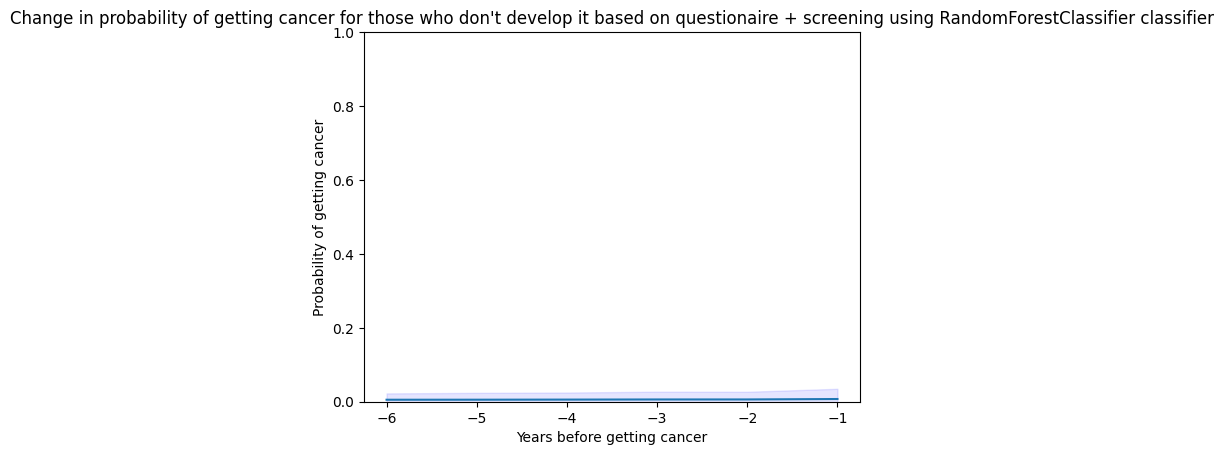

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 | -0.0001     |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |  0.00333333 |              80 |            39008 

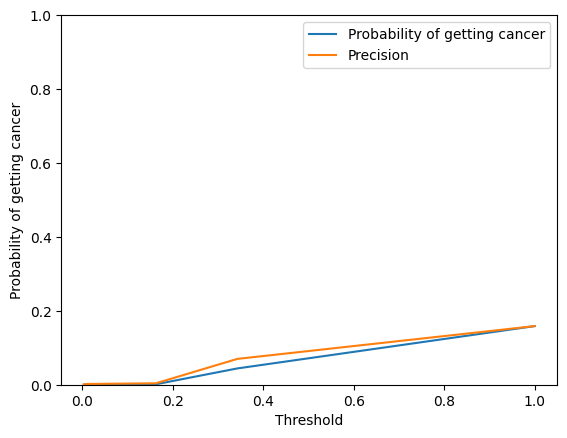



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.99932   | 7.51711e-05 | 0.999199 | 0.999496 |
| recall__class_0    | 0.999753  | 0.000173579 | 0.999395 | 1        |
| f1-score__class_0  | 0.999537  | 8.59625e-05 | 0.999344 | 0.999653 |
| precision__class_1 | 0.185714  | 0.19321     | 0        | 0.5      |
| recall__class_1    | 0.0880952 | 0.0967461   | 0        | 0.285714 |
| f1-score__class_1  | 0.115411  | 0.119493    | 0        | 0.333333 |
| accuracy           | 0.999074  | 0.000171765 | 0.998689 | 0.999306 |
| auc                | 0.907668  | 0.0704488   | 0.770668 | 0.990142 |
+--------------------+-----------+-------------+----------+----------+
_for_experiment_participants_screened_ultra_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


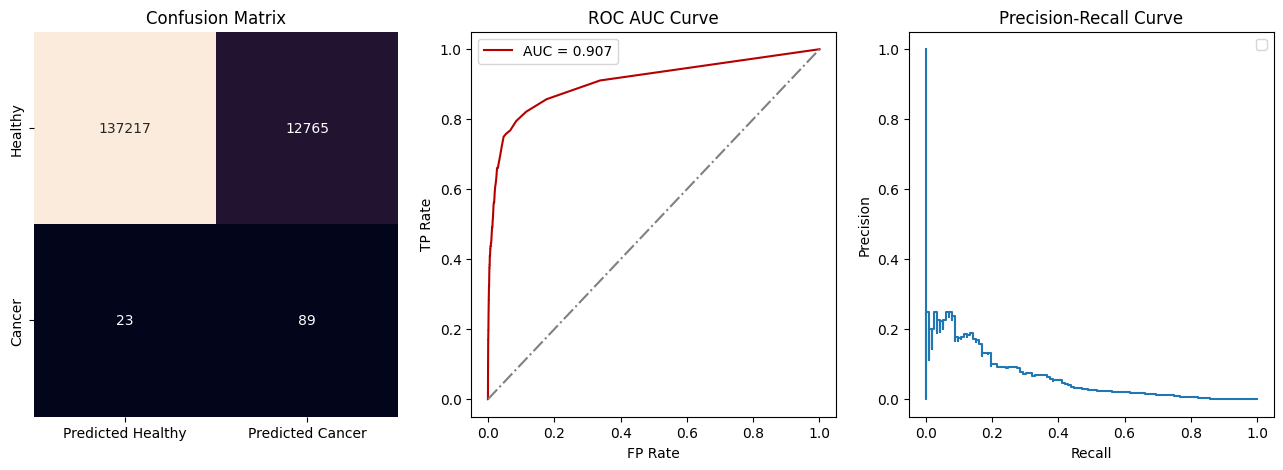

+---------------------------+---------+------------+------------+-------+--------+------------+------------+-----------+
|                           |   count |       mean |        std |   min |    25% |        50% |        75% |       max |
|---------------------------+---------+------------+------------+-------+--------+------------+------------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.00208333 | 0.00353553 |     0 | 0      | 0          | 0.00333333 | 0.01      |
| cancer_in_next_1_years_-5 |      20 | 0.00283333 | 0.00436292 |     0 | 0      | 0          | 0.00333333 | 0.0166667 |
| cancer_in_next_1_years_-4 |      36 | 0.0172222  | 0.0572241  |     0 | 0      | 0          | 0.00416667 | 0.28      |
| cancer_in_next_1_years_-3 |      51 | 0.0114379  | 0.0344109  |     0 | 0      | 0          | 0.01       | 0.23      |
| cancer_in_next_1_years_-2 |      75 | 0.0168     | 0.052549   |     0 | 0      | 0.00333333 | 0.00666667 | 0.383333  |
| cancer_in_next_1_years_-1 |   

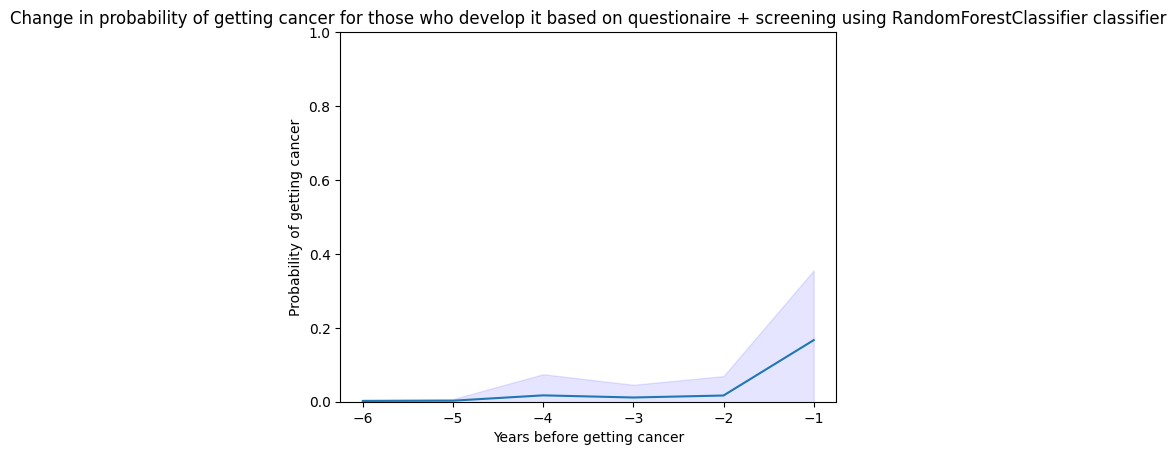

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.0051191  | 0.0201909 |     0 |     0 |     0 | 0.00333333 | 0.783333 |
| cancer_in_next_1_years_-5 |   22319 | 0.00496901 | 0.0185304 |     0 |     0 |     0 | 0.00333333 | 0.75     |
| cancer_in_next_1_years_-4 |   25070 | 0.00499721 | 0.017684  |     0 |     0 |     0 | 0.00333333 | 0.583333 |
| cancer_in_next_1_years_-3 |   26219 | 0.00563281 | 0.0211381 |     0 |     0 |     0 | 0.00333333 | 0.566667 |
| cancer_in_next_1_years_-2 |   24683 | 0.00412065 | 0.0224705 |     0 |     0 |     0 | 0.00333333 | 0.696667 |
| cancer_in_next_1_years_-1 |   30552 | 0.00692972 | 0.0344103 |     0 |     0 |     0 | 0.00333

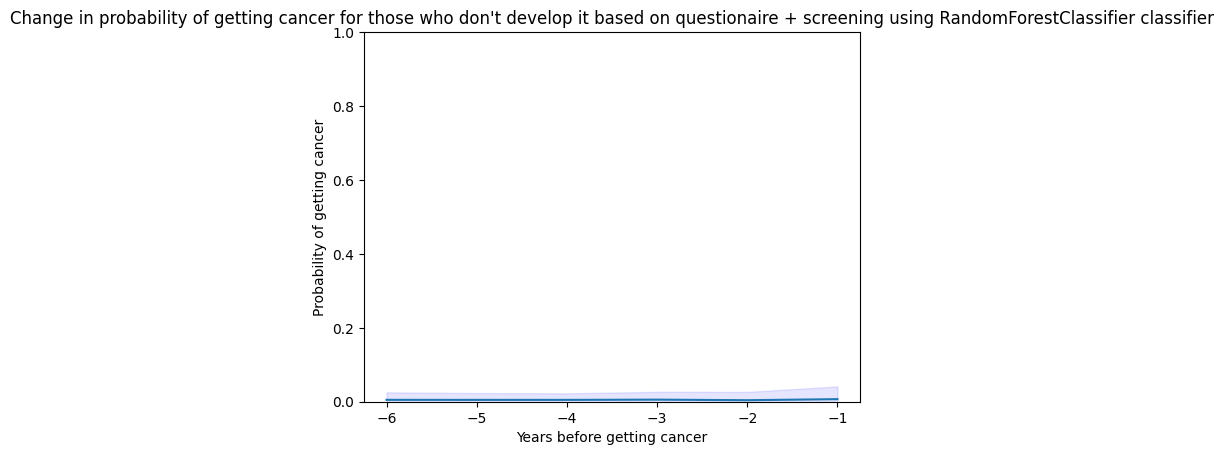

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |            1          |                nan |                nan |             nan          |
|  1 |   0.0106667 |              89 |            12765 

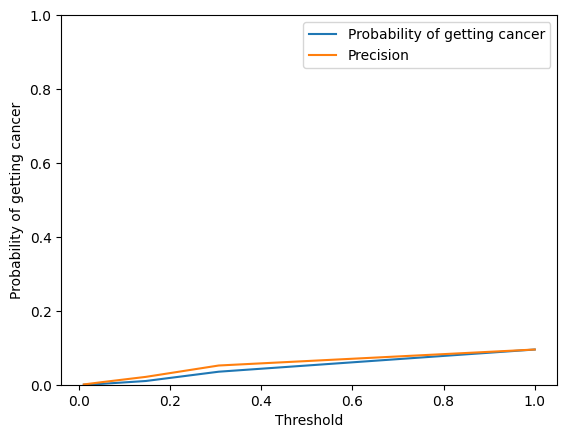



Cross-Validation measures:
+--------------------+------------+-------------+----------+-----------+
|                    |       mean |         std |      min |       max |
|--------------------+------------+-------------+----------+-----------|
| precision__class_0 | 0.992118   | 0.000547682 | 0.991403 | 0.993433  |
| recall__class_0    | 0.99992    | 8.64354e-05 | 0.999798 | 1         |
| f1-score__class_0  | 0.996003   | 0.000286334 | 0.995651 | 0.996706  |
| precision__class_1 | 0.155556   | 0.298586    | 0        | 1         |
| recall__class_1    | 0.00488412 | 0.00899496  | 0        | 0.0243902 |
| f1-score__class_1  | 0.00944462 | 0.0173774   | 0        | 0.047619  |
| accuracy           | 0.992039   | 0.000568184 | 0.99134  | 0.993433  |
| auc                | 0.571728   | 0.0597944   | 0.471237 | 0.673754  |
+--------------------+------------+-------------+----------+-----------+
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_ovar_cancer__15_tri

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


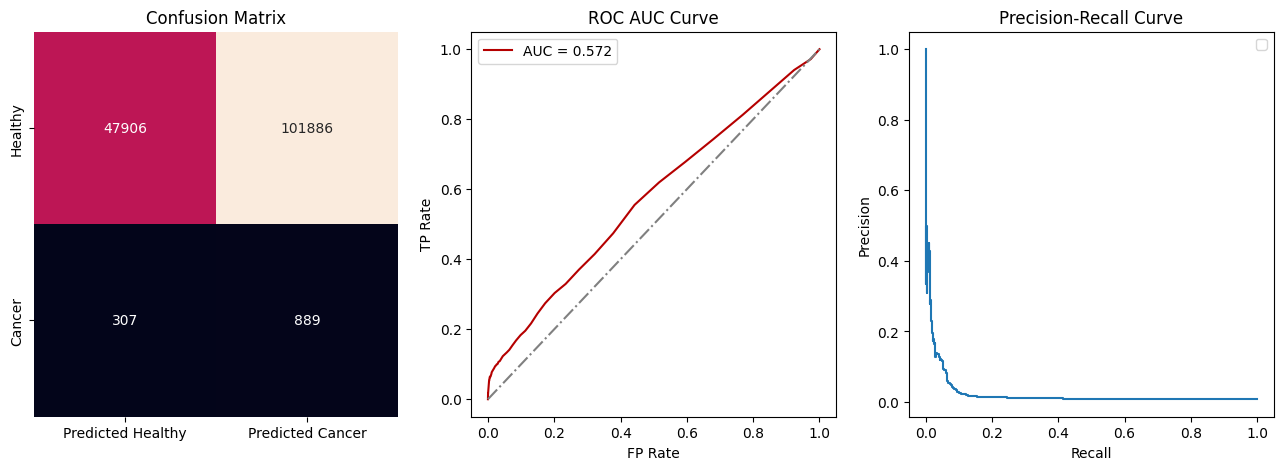

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |            1196 |           149792 |               0 |                0 |  0.00792116 | 1        |             1        |              1        |                nan |                nan |             nan          |
|  1 |   0.0133333 |             889 |           101886 

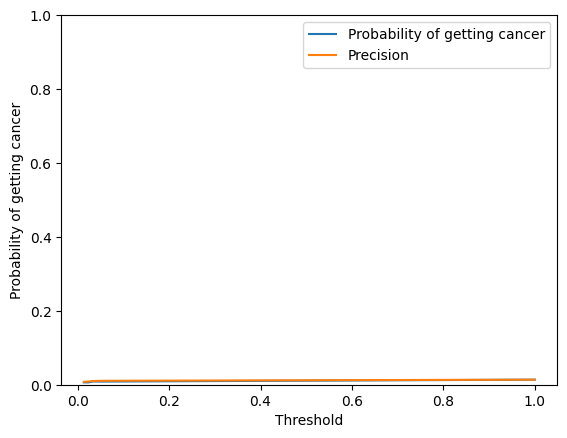



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999407 | 0.000116943 | 0.999198 | 0.999703 |
| recall__class_0    | 0.999786 | 0.000177259 | 0.9993   | 1        |
| f1-score__class_0  | 0.999596 | 0.000105054 | 0.99935  | 0.999802 |
| precision__class_1 | 0.425    | 0.286173    | 0        | 1        |
| recall__class_1    | 0.203571 | 0.14983     | 0        | 0.625    |
| f1-score__class_1  | 0.263257 | 0.176931    | 0        | 0.714286 |
| accuracy           | 0.999193 | 0.000209944 | 0.9987   | 0.999604 |
| auc                | 0.931733 | 0.0752572   | 0.745101 | 0.998517 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.023333333

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


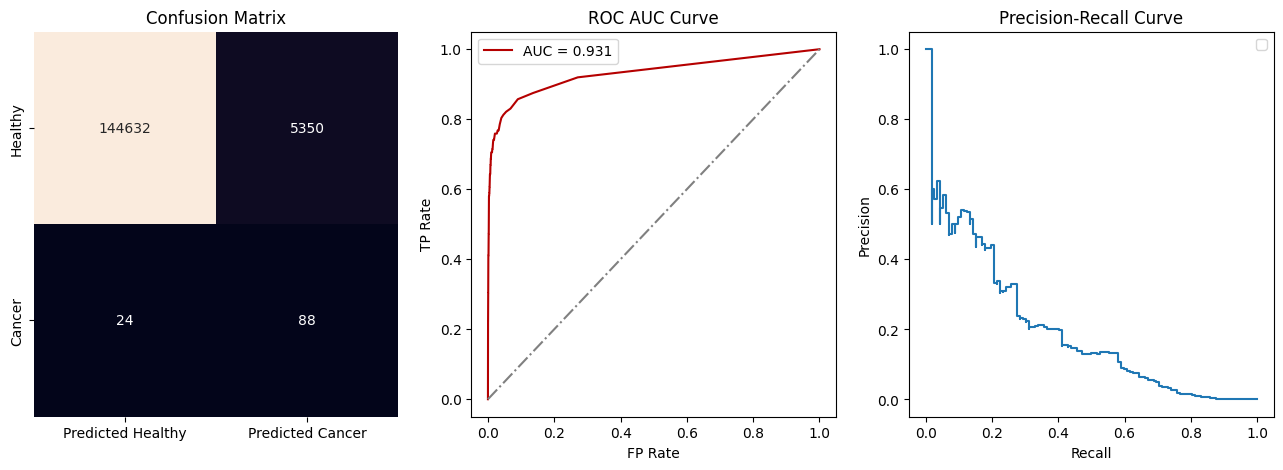

+---------------------------+---------+------------+------------+-------+-----------+-------+-------------+------------+
|                           |   count |       mean |        std |   min |       25% |   50% |         75% |        max |
|---------------------------+---------+------------+------------+-------+-----------+-------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00125    | 0.00248008 |     0 | 0         | 0     | 0.000833333 | 0.00666667 |
| cancer_in_next_1_years_-5 |      20 | 0.00766667 | 0.0239664  |     0 | 0         | 0     | 0.000833333 | 0.103333   |
| cancer_in_next_1_years_-4 |      36 | 0.0122222  | 0.0400476  |     0 | 0         | 0     | 0.00333333  | 0.213333   |
| cancer_in_next_1_years_-3 |      51 | 0.0130719  | 0.0384178  |     0 | 0         | 0     | 0.00666667  | 0.213333   |
| cancer_in_next_1_years_-2 |      75 | 0.0265778  | 0.0811479  |     0 | 0         | 0     | 0.00833333  | 0.446667   |
| cancer_in_next_1_years_-1 |   

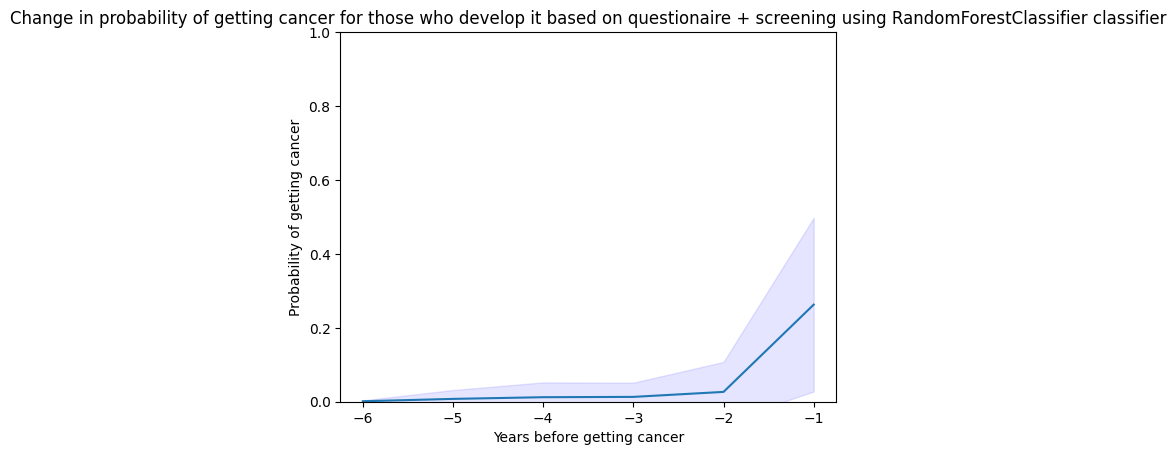

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00391045 | 0.017531  |     0 |     0 |     0 | 0.00333333 | 0.683333 |
| cancer_in_next_1_years_-5 |   22319 | 0.00384949 | 0.017233  |     0 |     0 |     0 | 0.00333333 | 0.56     |
| cancer_in_next_1_years_-4 |   25070 | 0.00387714 | 0.0169345 |     0 |     0 |     0 | 0.00333333 | 0.656667 |
| cancer_in_next_1_years_-3 |   26219 | 0.00450144 | 0.0197036 |     0 |     0 |     0 | 0.00333333 | 0.54     |
| cancer_in_next_1_years_-2 |   24683 | 0.00376845 | 0.0197443 |     0 |     0 |     0 | 0          | 0.713333 |
| cancer_in_next_1_years_-1 |   30552 | 0.00640733 | 0.0323829 |     0 |     0 |     0 | 0.00333

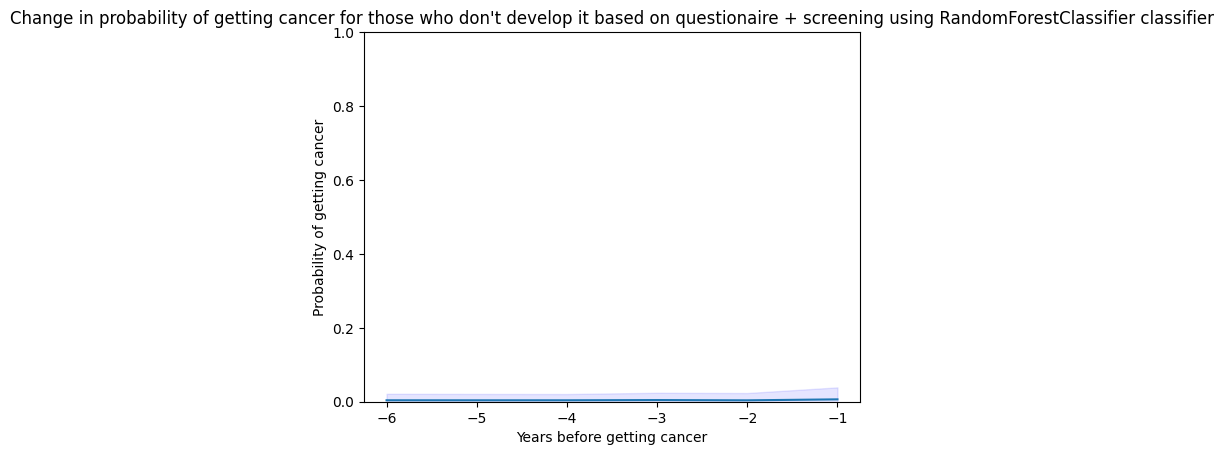

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |   0.0233333 |              88 |             5350 

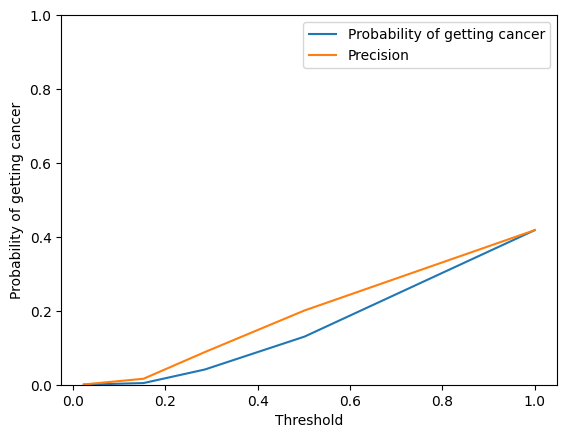



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.998151  | 0.000332618 | 0.997635 | 0.998709 |
| recall__class_0    | 0.999794  | 0.000167257 | 0.999397 | 1        |
| f1-score__class_0  | 0.998972  | 0.000185211 | 0.998694 | 0.99931  |
| precision__class_1 | 0.274444  | 0.267326    | 0        | 0.75     |
| recall__class_1    | 0.0497096 | 0.0529759   | 0        | 0.176471 |
| f1-score__class_1  | 0.0821465 | 0.0854481   | 0        | 0.285714 |
| accuracy           | 0.997946  | 0.000369714 | 0.997391 | 0.998622 |
| auc                | 0.752126  | 0.0954406   | 0.609217 | 0.94134  |
+--------------------+-----------+-------------+----------+----------+
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_3_years__15_trials
[-0.0001,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


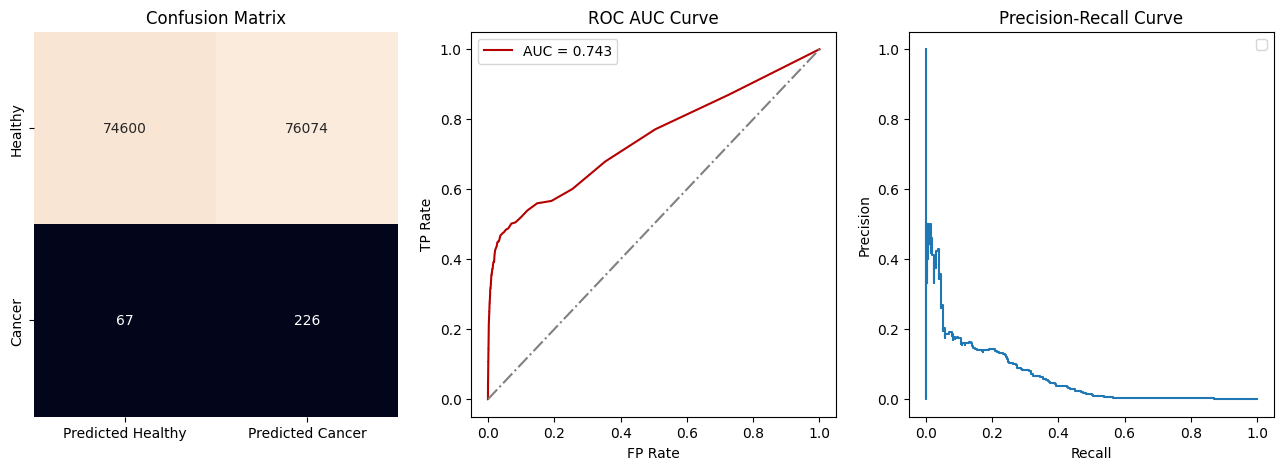

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 | -0.0001     |             293 |           150674 |               0 |                0 |  0.00194082 | 1        |             1        |            1          |                nan |                nan |            nan           |
|  1 |  0.00333333 |             226 |            76074 

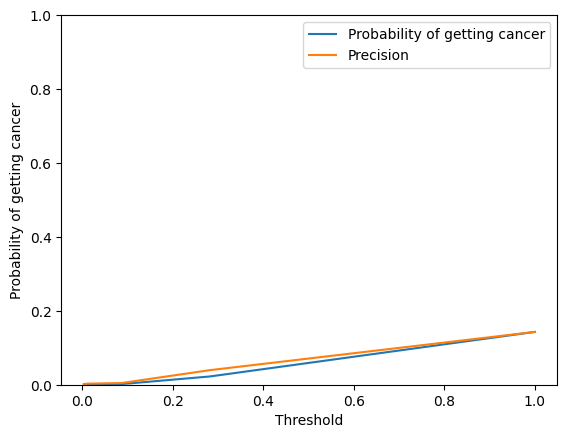



Cross-Validation measures:
+--------------------+-----------+-------------+----------+-----------+
|                    |      mean |         std |      min |       max |
|--------------------+-----------+-------------+----------+-----------|
| precision__class_0 | 0.997078  | 0.000385528 | 0.996508 | 0.997911  |
| recall__class_0    | 0.999813  | 0.000164607 | 0.999499 | 1         |
| f1-score__class_0  | 0.998444  | 0.000200952 | 0.998089 | 0.998905  |
| precision__class_1 | 0.376825  | 0.352711    | 0        | 1         |
| recall__class_1    | 0.0341855 | 0.0302517   | 0        | 0.0869565 |
| f1-score__class_1  | 0.0604413 | 0.052214    | 0        | 0.153846  |
| accuracy           | 0.996892  | 0.00040073  | 0.996185 | 0.997812  |
| auc                | 0.651068  | 0.0861715   | 0.482664 | 0.750725  |
+--------------------+-----------+-------------+----------+-----------+
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_5_years__15_tria

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


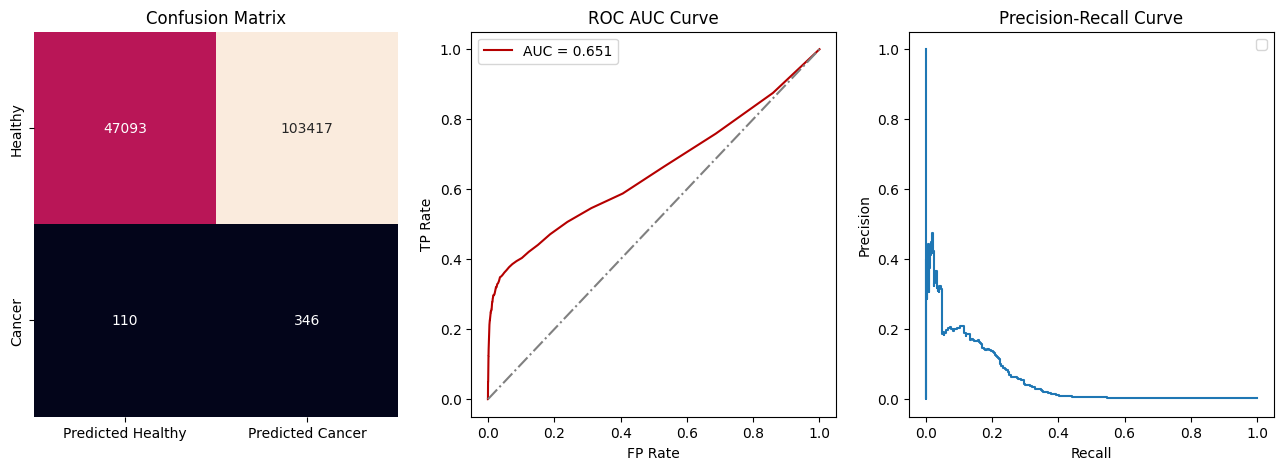

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 | -0.0001     |             456 |           150510 |               0 |                0 |  0.00302055 | 1        |             1        |            1          |                nan |                nan |             nan          |
|  1 |  0.00333333 |             346 |           103417 

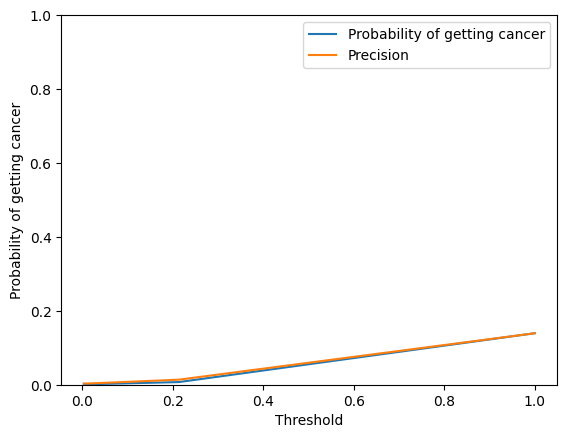



Cross-Validation measures:
+--------------------+-----------+-------------+----------+-----------+
|                    |      mean |         std |      min |       max |
|--------------------+-----------+-------------+----------+-----------|
| precision__class_0 | 0.994249  | 0.000473737 | 0.993307 | 0.994838  |
| recall__class_0    | 0.99992   | 8.65638e-05 | 0.999798 | 1         |
| f1-score__class_0  | 0.997076  | 0.000260436 | 0.996593 | 0.997412  |
| precision__class_1 | 0.266667  | 0.371612    | 0        | 1         |
| recall__class_1    | 0.0114824 | 0.0156303   | 0        | 0.0363636 |
| f1-score__class_1  | 0.0219117 | 0.0297627   | 0        | 0.0701754 |
| accuracy           | 0.99417   | 0.000517878 | 0.993208 | 0.994838  |
| auc                | 0.591702  | 0.0586345   | 0.512138 | 0.733463  |
+--------------------+-----------+-------------+----------+-----------+
_for_experiment_participants_screened_single_first_5_RandomForestClassifier_cancer_in_next_10_years__15_tri

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


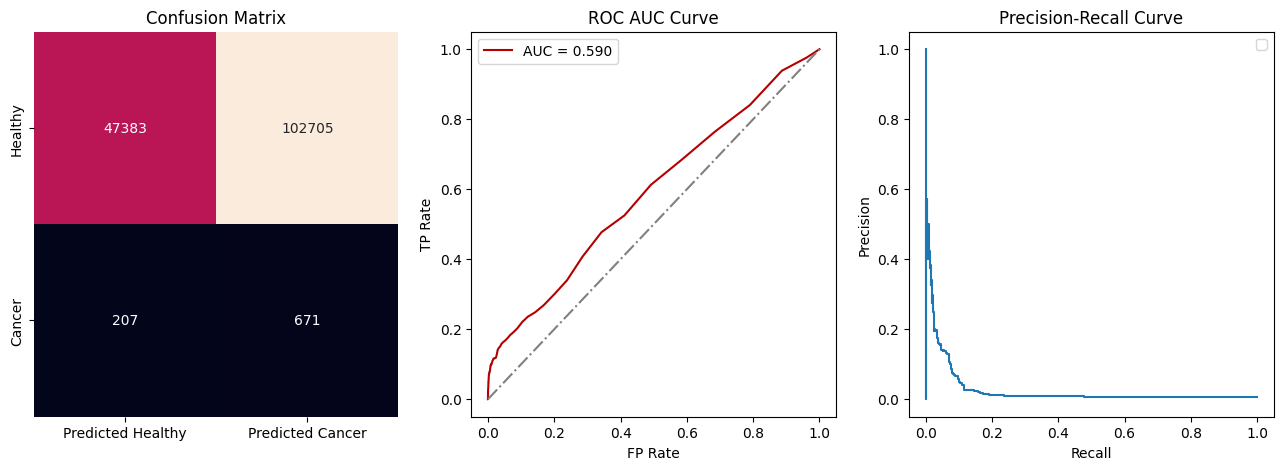

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             878 |           150088 |               0 |                0 |  0.00581588 | 1        |             1        |             1         |                nan |                nan |             nan          |
|  1 |   0.01      |             671 |           102705 

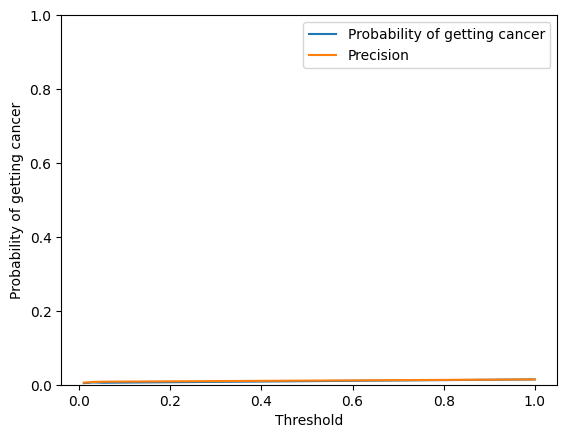



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999347 | 0.000228717 | 0.998997 | 0.999802 |
| recall__class_0    | 0.999826 | 0.000159015 | 0.999494 | 1        |
| f1-score__class_0  | 0.999586 | 0.000124002 | 0.999343 | 0.999851 |
| precision__class_1 | 0.367778 | 0.393825    | 0        | 1        |
| recall__class_1    | 0.110308 | 0.118684    | 0        | 0.375    |
| f1-score__class_1  | 0.155453 | 0.156662    | 0        | 0.461538 |
| accuracy           | 0.999173 | 0.000247772 | 0.998687 | 0.999703 |
| auc                | 0.876965 | 0.102097    | 0.660127 | 0.998662 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_participants_screened_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.0033333333333333

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


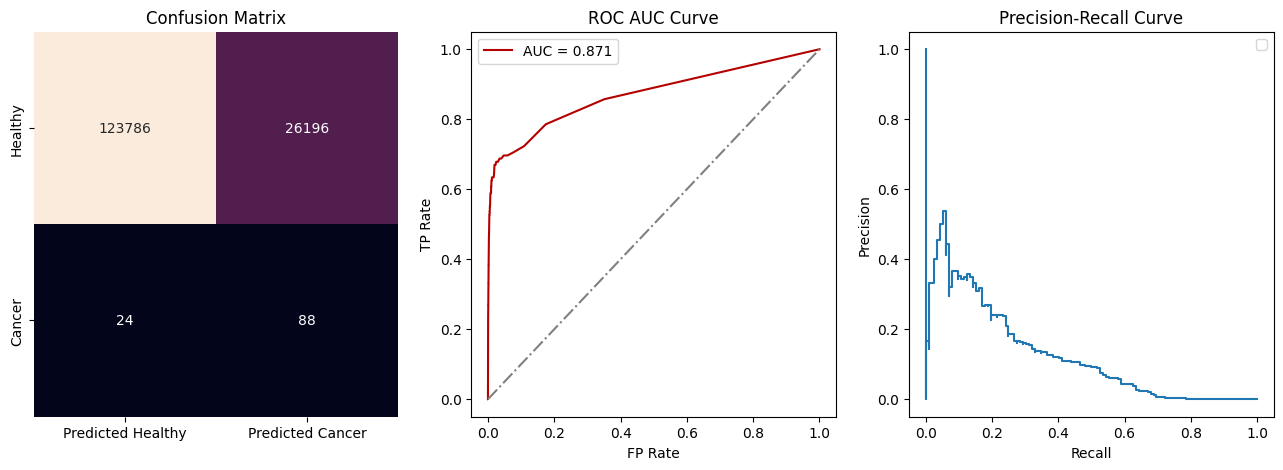

+---------------------------+---------+------------+------------+-------+------------+------------+-------------+------------+
|                           |   count |       mean |        std |   min |        25% |        50% |         75% |        max |
|---------------------------+---------+------------+------------+-------+------------+------------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00125    | 0.00248008 |     0 | 0          | 0          | 0.000833333 | 0.00666667 |
| cancer_in_next_1_years_-5 |      20 | 0.00933333 | 0.0263712  |     0 | 0          | 0          | 0.00333333  | 0.116667   |
| cancer_in_next_1_years_-4 |      36 | 0.0156481  | 0.0454104  |     0 | 0          | 0          | 0.00666667  | 0.23       |
| cancer_in_next_1_years_-3 |      51 | 0.0201961  | 0.0641506  |     0 | 0          | 0          | 0.00833333  | 0.403333   |
| cancer_in_next_1_years_-2 |      75 | 0.0284889  | 0.0758442  |     0 | 0          | 0.00333333 | 0.00833333 

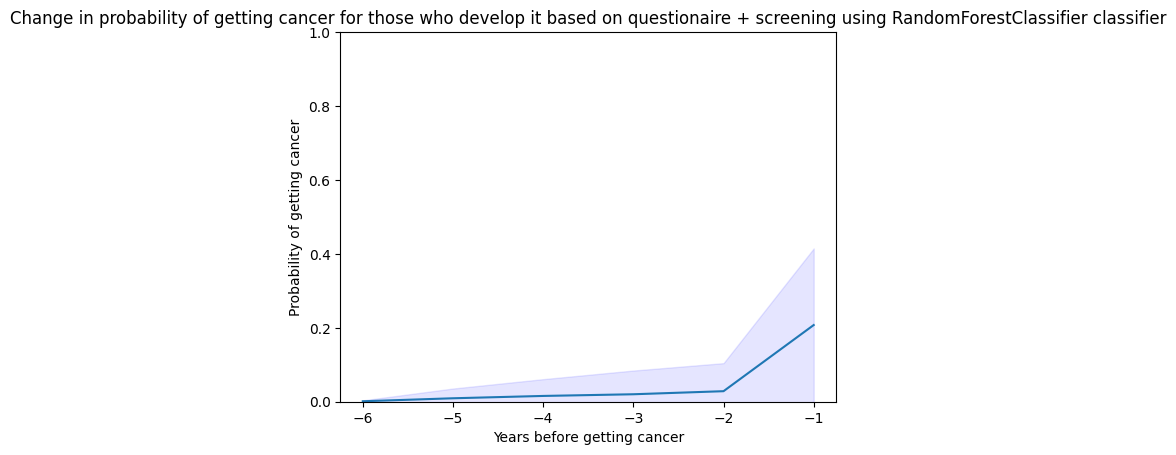

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00414608 | 0.0177465 |     0 |     0 |     0 | 0.00333333 | 0.61     |
| cancer_in_next_1_years_-5 |   22319 | 0.00408783 | 0.0173648 |     0 |     0 |     0 | 0.00333333 | 0.716667 |
| cancer_in_next_1_years_-4 |   25070 | 0.0042082  | 0.0171975 |     0 |     0 |     0 | 0.00333333 | 0.57     |
| cancer_in_next_1_years_-3 |   26219 | 0.00489147 | 0.0206805 |     0 |     0 |     0 | 0.00333333 | 0.506667 |
| cancer_in_next_1_years_-2 |   24683 | 0.00474507 | 0.0199364 |     0 |     0 |     0 | 0.00333333 | 0.64     |
| cancer_in_next_1_years_-1 |   30552 | 0.00671486 | 0.0299091 |     0 |     0 |     0 | 0.00333

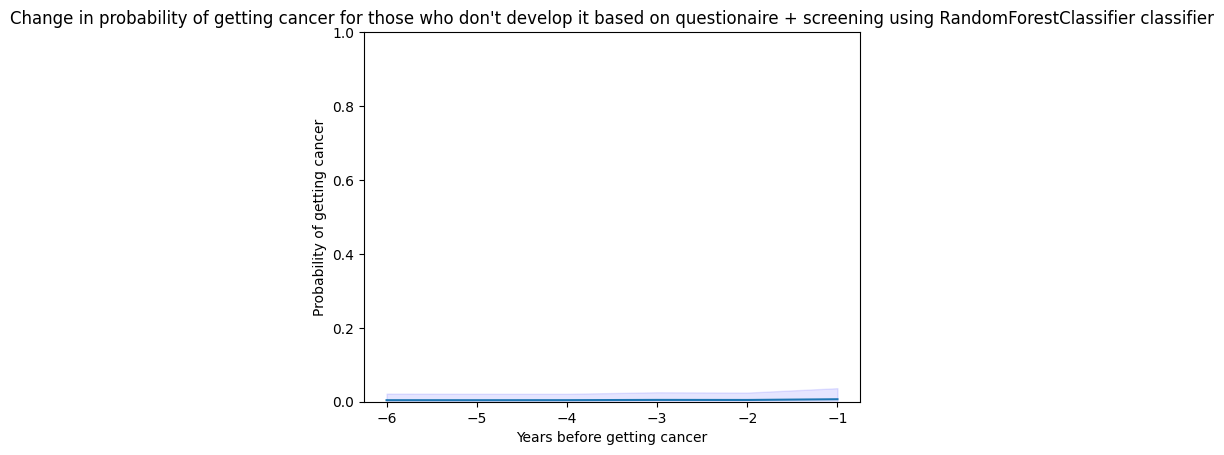

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 | -0.0001     |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |            1          |                nan |                nan |            nan           |
|  1 |  0.00333333 |              88 |            26196 

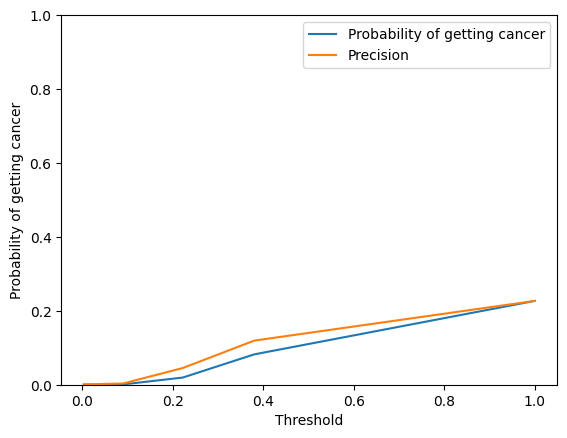



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.992086 | 0.00133473  | 0.989302 | 0.993731 |
| recall__class_0    | 0.999236 | 0.000661688 | 0.997842 | 1        |
| f1-score__class_0  | 0.995648 | 0.000812516 | 0.993553 | 0.996779 |
| precision__class_1 | 0        | 0           | 0        | 0        |
| recall__class_1    | 0        | 0           | 0        | 0        |
| f1-score__class_1  | 0        | 0           | 0        | 0        |
| accuracy           | 0.991335 | 0.0016096   | 0.987189 | 0.993579 |
| auc                | 0.531102 | 0.0785275   | 0.343302 | 0.629492 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_ovar_cancer__15_trials
[-0.0001, 0.02666666666666667,

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


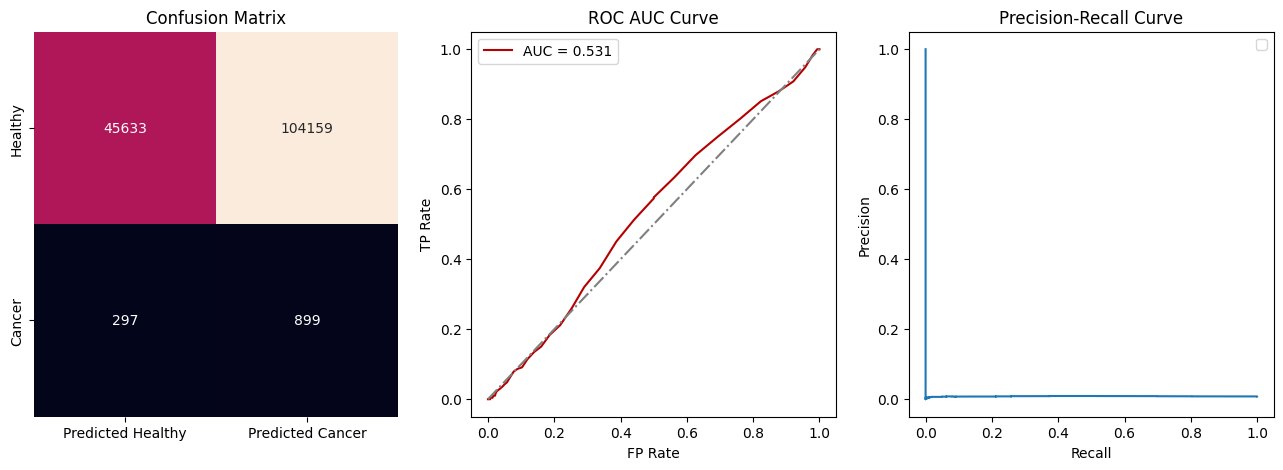

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |            1196 |           149792 |               0 |                0 |  0.00792116 | 1        |             1        |              1        |                nan |                nan |             nan          |
|  1 |   0.0266667 |             899 |           104159 

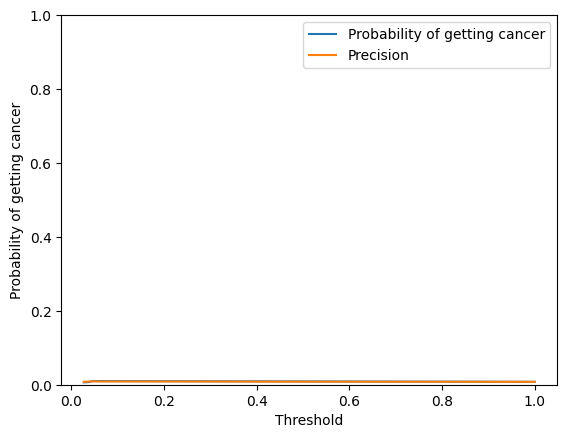



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999253 | 0.000275809 | 0.998814 | 0.999595 |
| recall__class_0    | 0.996419 | 0.00113246  | 0.993905 | 0.998092 |
| f1-score__class_0  | 0.997833 | 0.000550621 | 0.996444 | 0.998565 |
| precision__class_1 | 0        | 0           | 0        | 0        |
| recall__class_1    | 0        | 0           | 0        | 0        |
| f1-score__class_1  | 0        | 0           | 0        | 0        |
| accuracy           | 0.995677 | 0.00109591  | 0.992913 | 0.997134 |
| auc                | 0.528408 | 0.109923    | 0.370928 | 0.711977 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_not_screened_cols_single_label_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.0066666

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


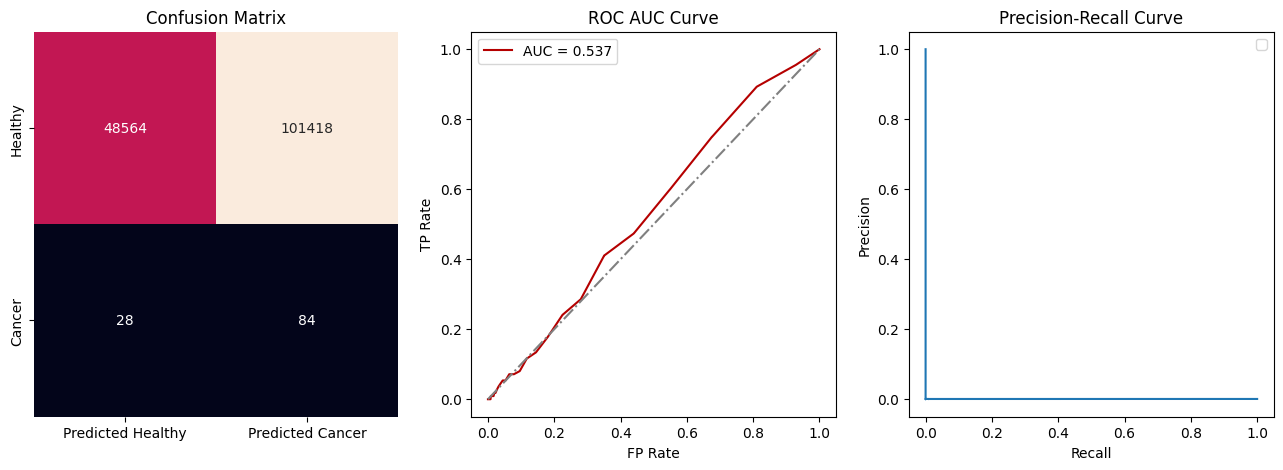

+---------------------------+---------+-----------+-----------+------------+------------+-----------+-----------+-----------+
|                           |   count |      mean |       std |        min |        25% |       50% |       75% |       max |
|---------------------------+---------+-----------+-----------+------------+------------+-----------+-----------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.0245833 | 0.027135  | 0.00666667 | 0.0125     | 0.015     | 0.0216667 | 0.09      |
| cancer_in_next_1_years_-5 |      20 | 0.0185    | 0.0188088 | 0.00333333 | 0.01       | 0.0133333 | 0.02      | 0.09      |
| cancer_in_next_1_years_-4 |      36 | 0.0165741 | 0.0154403 | 0          | 0.01       | 0.0133333 | 0.02      | 0.09      |
| cancer_in_next_1_years_-3 |      51 | 0.0178431 | 0.0166643 | 0          | 0.00833333 | 0.0133333 | 0.0233333 | 0.0933333 |
| cancer_in_next_1_years_-2 |      75 | 0.0171111 | 0.0150508 | 0          | 0.00666667 | 0.0133333 | 0.0233333 | 0.09

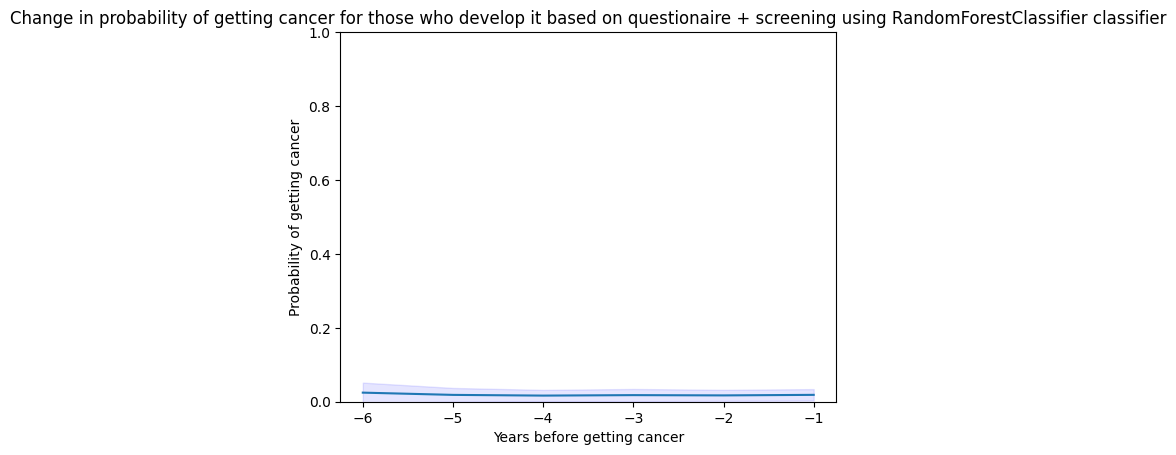

+---------------------------+---------+-----------+-----------+-------+------------+-----------+-----------+----------+
|                           |   count |      mean |       std |   min |        25% |       50% |       75% |      max |
|---------------------------+---------+-----------+-----------+-------+------------+-----------+-----------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.0181871 | 0.0319825 |     0 | 0.00666667 | 0.0133333 | 0.0233333 | 0.84232  |
| cancer_in_next_1_years_-5 |   22319 | 0.0201211 | 0.0472731 |     0 | 0.00666667 | 0.0133333 | 0.0233333 | 0.844749 |
| cancer_in_next_1_years_-4 |   25070 | 0.0201256 | 0.0456364 |     0 | 0.00666667 | 0.0133333 | 0.0233333 | 0.844749 |
| cancer_in_next_1_years_-3 |   26219 | 0.0201559 | 0.0444684 |     0 | 0.00666667 | 0.0133333 | 0.0233333 | 0.844749 |
| cancer_in_next_1_years_-2 |   24683 | 0.0197156 | 0.0421342 |     0 | 0.00666667 | 0.0133333 | 0.0233333 | 0.84232  |
| cancer_in_next_1_years_-1 |   30552 | 

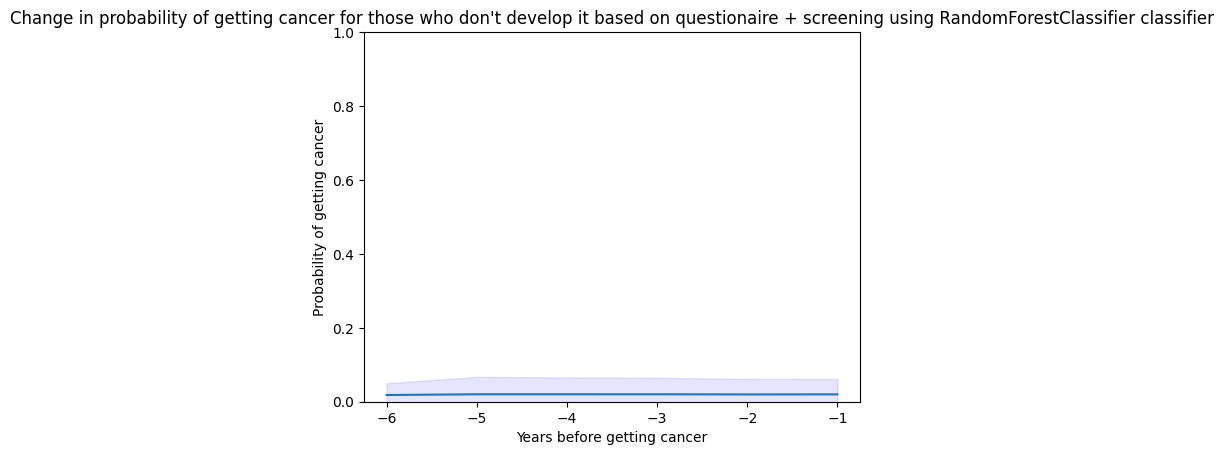

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 | -0.0001     |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |              1        |                nan |                nan |            nan           |
|  1 |  0.00666667 |              84 |           101418 

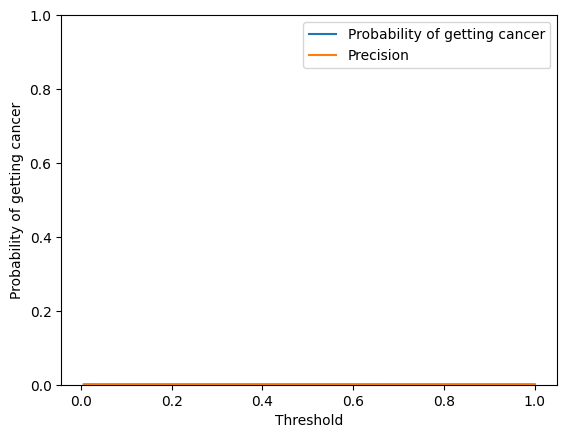



Cross-Validation measures:
+--------------------+-----------+-------------+----------+-----------+
|                    |      mean |         std |      min |       max |
|--------------------+-----------+-------------+----------+-----------|
| precision__class_0 | 0.999462  | 0.000245173 | 0.999092 | 1         |
| recall__class_0    | 0.990383  | 0.00208002  | 0.986194 | 0.995551  |
| f1-score__class_0  | 0.994901  | 0.00101453  | 0.992799 | 0.997417  |
| precision__class_1 | 0.0227334 | 0.0186893   | 0        | 0.0576923 |
| recall__class_1    | 0.304667  | 0.274428    | 0        | 1         |
| f1-score__class_1  | 0.0413342 | 0.0333361   | 0        | 0.107143  |
| accuracy           | 0.989857  | 0.00200893  | 0.985704 | 0.994847  |
| auc                | 0.855492  | 0.112399    | 0.660167 | 0.988953  |
+--------------------+-----------+-------------+----------+-----------+
_for_experiment_participants_screened_cols_first_5_RandomForestClassifier_cancer_in_next_1_years__15_trials

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


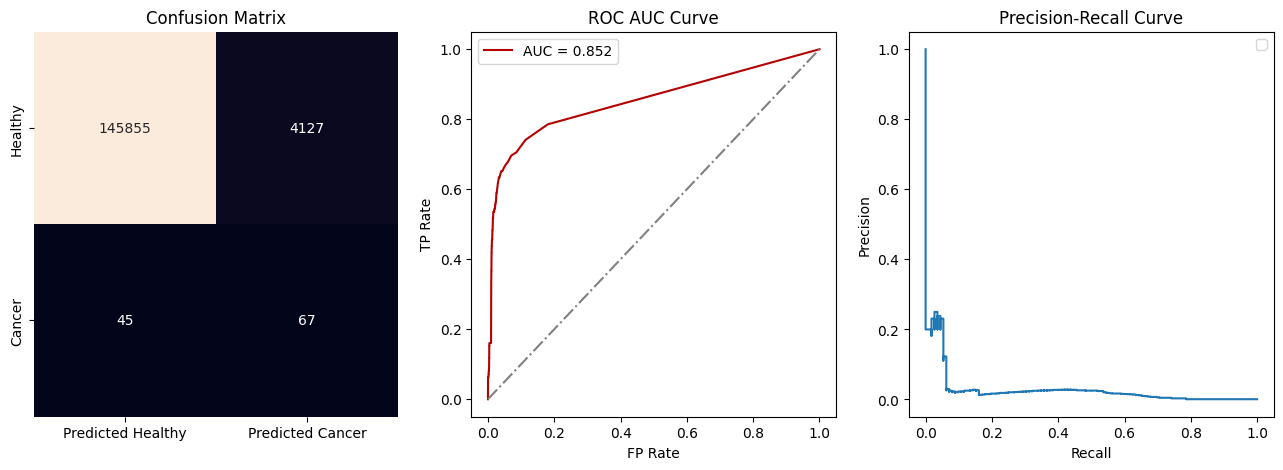

+---------------------------+---------+------------+------------+-------+------------+-------+------------+-----------+
|                           |   count |       mean |        std |   min |        25% |   50% |        75% |       max |
|---------------------------+---------+------------+------------+-------+------------+-------+------------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.00166667 | 0.00471405 |     0 | 0          | 0     | 0          | 0.0133333 |
| cancer_in_next_1_years_-5 |      20 | 0.0228267  | 0.0607996  |     0 | 0          | 0     | 0.00833333 | 0.246533  |
| cancer_in_next_1_years_-4 |      36 | 0.0103704  | 0.0286054  |     0 | 0          | 0     | 0.00333333 | 0.153333  |
| cancer_in_next_1_years_-3 |      51 | 0.033374   | 0.128844   |     0 | 0          | 0     | 0.00333333 | 0.852074  |
| cancer_in_next_1_years_-2 |      75 | 0.0352     | 0.104497   |     0 | 0          | 0     | 0.00833333 | 0.573333  |
| cancer_in_next_1_years_-1 |     112 | 

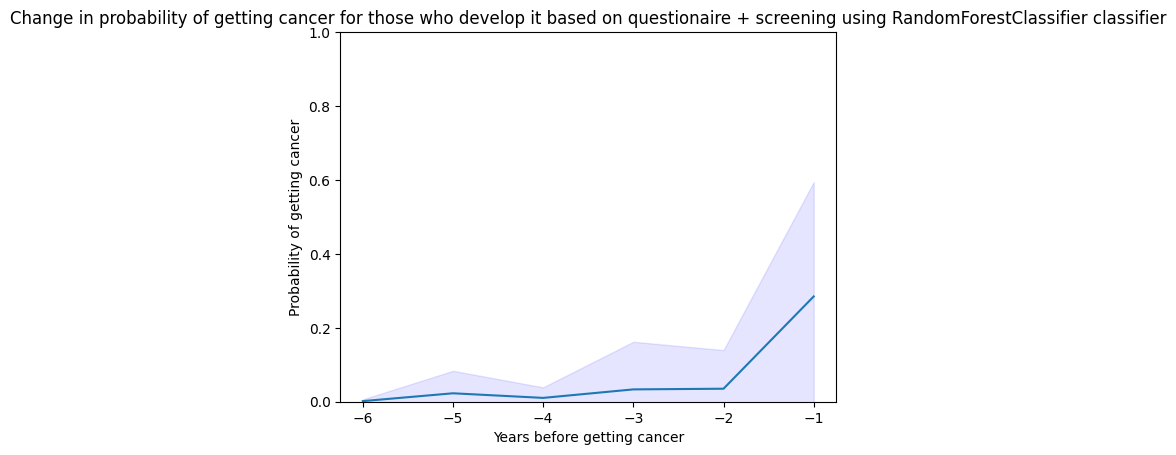

+---------------------------+---------+------------+-----------+-------+-------+-------+-------+-------+
|                           |   count |       mean |       std |   min |   25% |   50% |   75% |   max |
|---------------------------+---------+------------+-----------+-------+-------+-------+-------+-------|
| cancer_in_next_1_years_-6 |   20949 | 0.00947853 | 0.0668414 |     0 |     0 |     0 |     0 |  0.9  |
| cancer_in_next_1_years_-5 |   22319 | 0.00982857 | 0.0690174 |     0 |     0 |     0 |     0 |  0.97 |
| cancer_in_next_1_years_-4 |   25070 | 0.0104201  | 0.0715908 |     0 |     0 |     0 |     0 |  1    |
| cancer_in_next_1_years_-3 |   26219 | 0.01006    | 0.0680517 |     0 |     0 |     0 |     0 |  1    |
| cancer_in_next_1_years_-2 |   24683 | 0.0106336  | 0.0739795 |     0 |     0 |     0 |     0 |  1    |
| cancer_in_next_1_years_-1 |   30552 | 0.0130255  | 0.0802288 |     0 |     0 |     0 |     0 |  1    |
+---------------------------+---------+------------+---

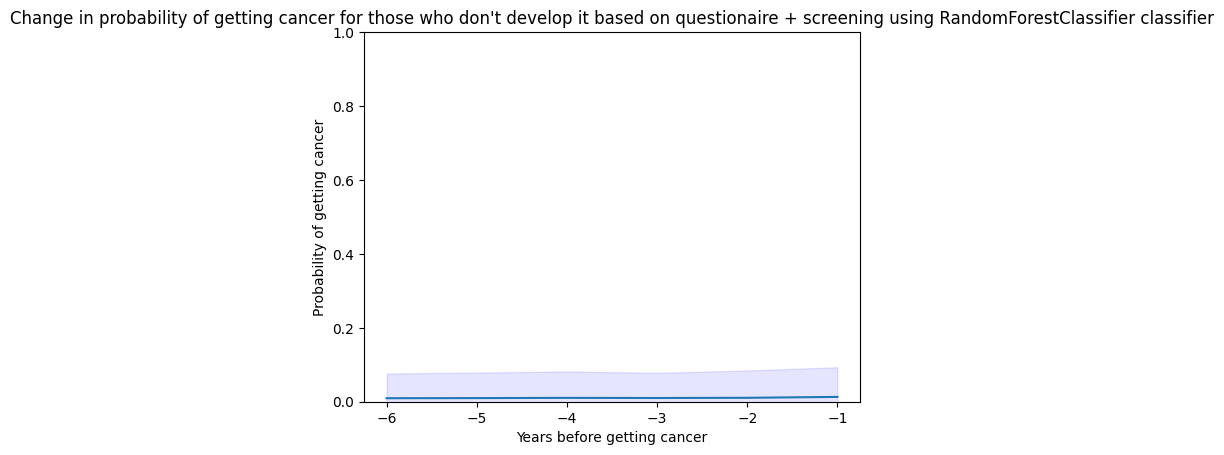

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |            1          |                nan |                nan |             nan          |
|  1 |   0.0513333 |              67 |             4127 

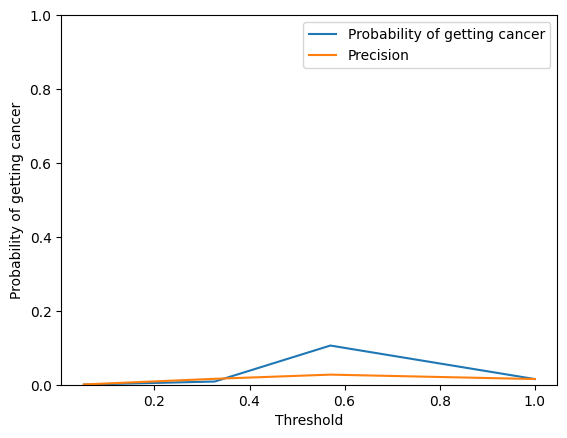



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999347 | 0.000252224 | 0.998912 | 0.999802 |
| recall__class_0    | 0.999813 | 0.000169886 | 0.999393 | 1        |
| f1-score__class_0  | 0.99958  | 0.000144622 | 0.999242 | 0.999901 |
| precision__class_1 | 0.307778 | 0.383223    | 0        | 1        |
| recall__class_1    | 0.114697 | 0.148971    | 0        | 0.428571 |
| f1-score__class_1  | 0.154826 | 0.190054    | 0        | 0.5      |
| accuracy           | 0.99916  | 0.000289007 | 0.998485 | 0.999802 |
| auc                | 0.873522 | 0.11237     | 0.607594 | 0.999158 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_participants_screened_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.00400000000000001, 0.083

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


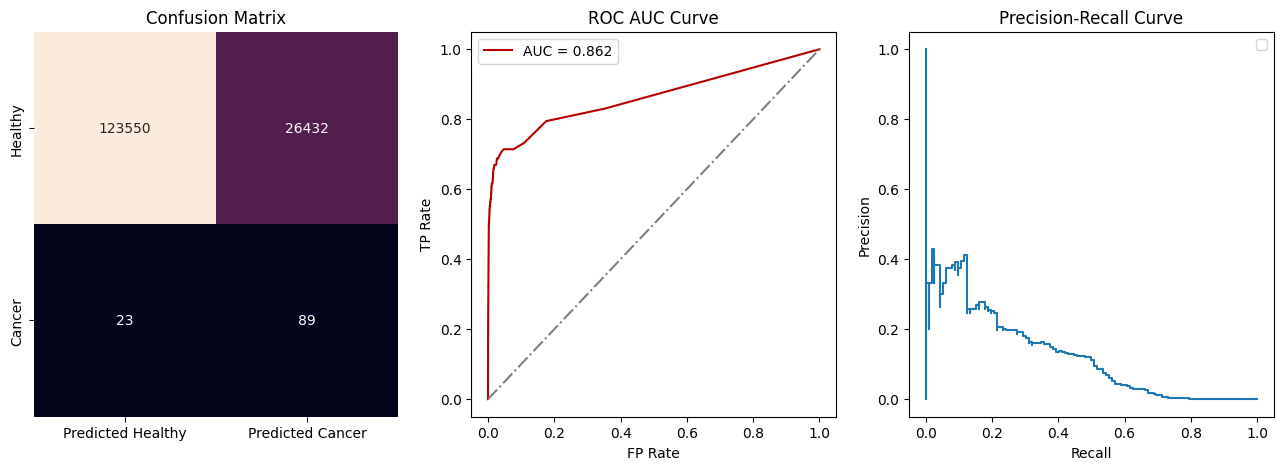

+---------------------------+---------+------------+------------+-------+------------+------------+-------------+------------+
|                           |   count |       mean |        std |   min |        25% |        50% |         75% |        max |
|---------------------------+---------+------------+------------+-------+------------+------------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.00125    | 0.00248008 |     0 | 0          | 0          | 0.000833333 | 0.00666667 |
| cancer_in_next_1_years_-5 |      20 | 0.00633333 | 0.0165399  |     0 | 0          | 0          | 0.00333333  | 0.0733333  |
| cancer_in_next_1_years_-4 |      36 | 0.0139815  | 0.0427456  |     0 | 0          | 0          | 0.00333333  | 0.186667   |
| cancer_in_next_1_years_-3 |      51 | 0.0185621  | 0.0597709  |     0 | 0          | 0          | 0.00333333  | 0.336667   |
| cancer_in_next_1_years_-2 |      75 | 0.0310667  | 0.0850775  |     0 | 0          | 0.00333333 | 0.01       

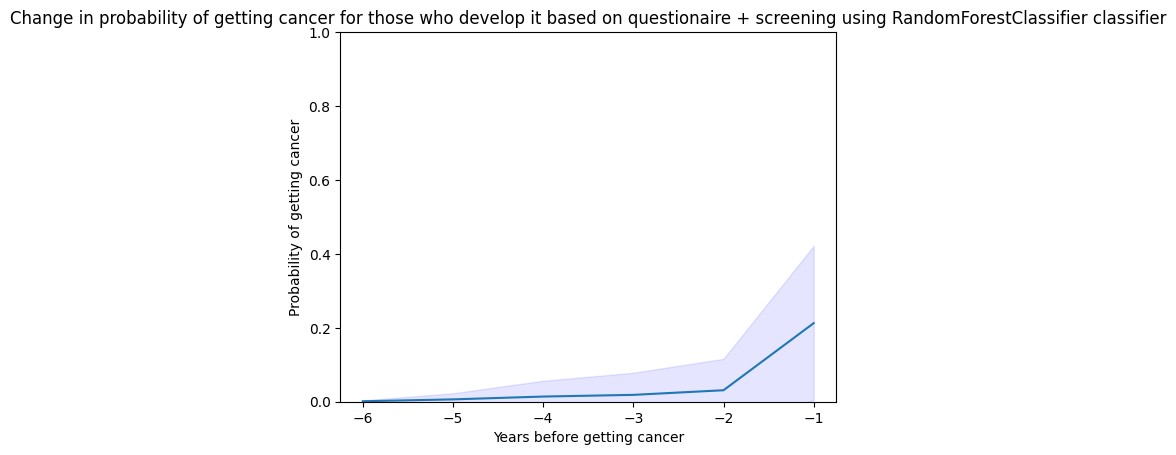

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00412218 | 0.018231  |     0 |     0 |     0 | 0.00333333 | 0.706667 |
| cancer_in_next_1_years_-5 |   22319 | 0.00415664 | 0.0177119 |     0 |     0 |     0 | 0.00333333 | 0.653333 |
| cancer_in_next_1_years_-4 |   25070 | 0.00421096 | 0.0171368 |     0 |     0 |     0 | 0.00333333 | 0.663333 |
| cancer_in_next_1_years_-3 |   26219 | 0.00485762 | 0.0205477 |     0 |     0 |     0 | 0.00333333 | 0.636667 |
| cancer_in_next_1_years_-2 |   24683 | 0.00473377 | 0.0199155 |     0 |     0 |     0 | 0.00333333 | 0.656667 |
| cancer_in_next_1_years_-1 |   30552 | 0.00672643 | 0.0302091 |     0 |     0 |     0 | 0.00333

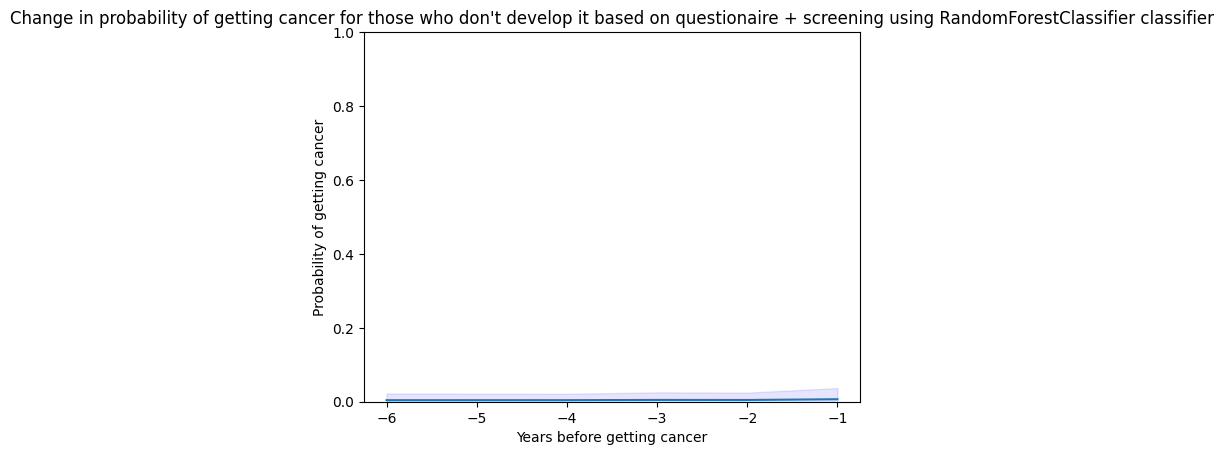

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |   0.004     |              89 |            26432 

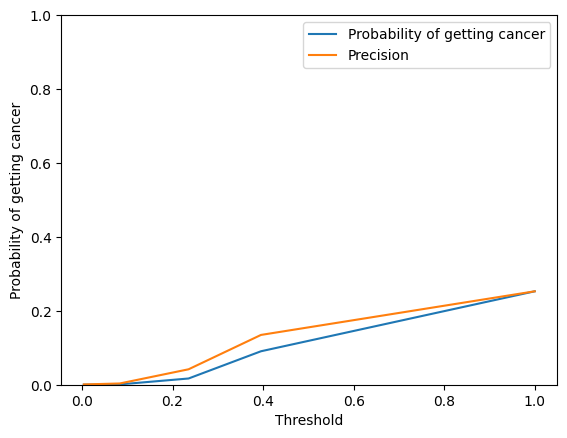



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.992069 | 0.00133388  | 0.989292 | 0.993694 |
| recall__class_0    | 0.996988 | 0.0012855   | 0.992899 | 0.998918 |
| f1-score__class_0  | 0.994522 | 0.000791454 | 0.993111 | 0.995491 |
| precision__class_1 | 0        | 0           | 0        | 0        |
| recall__class_1    | 0        | 0           | 0        | 0        |
| f1-score__class_1  | 0        | 0           | 0        | 0        |
| accuracy           | 0.989104 | 0.00156487  | 0.986316 | 0.991022 |
| auc                | 0.541531 | 0.0863095   | 0.381322 | 0.680655 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_ovar_cancer__15_trials
[-0.0001, 0.03, 0.04666666666666667, 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


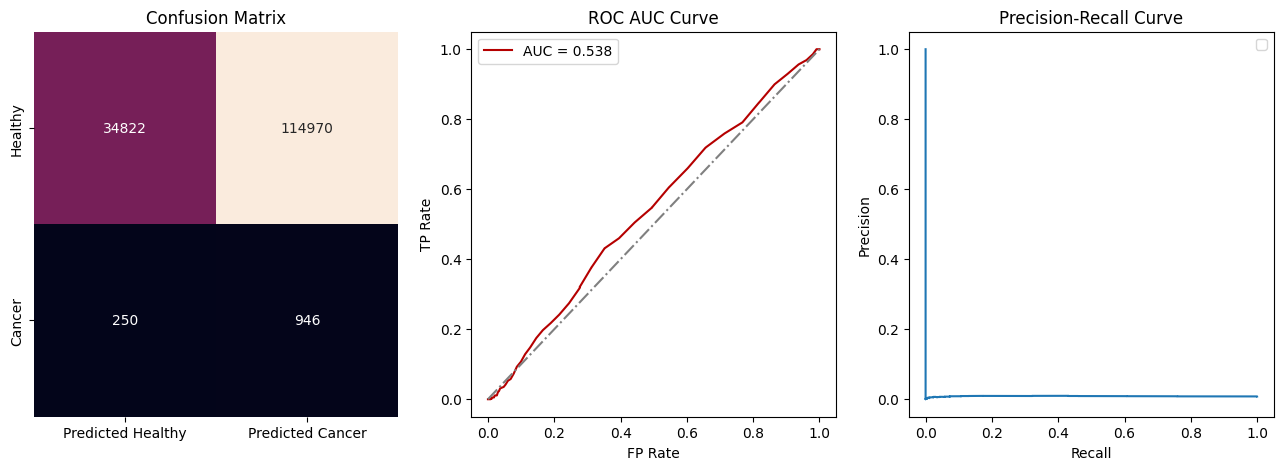

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |            1196 |           149792 |               0 |                0 |  0.00792116 | 1        |             1        |              1        |                nan |                nan |             nan          |
|  1 |   0.03      |             946 |           114970 

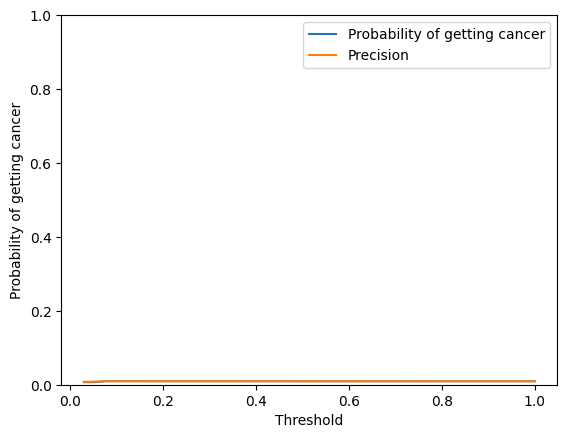



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999253 | 0.000990206 | 0.997397 | 1        |
| recall__class_0    | 0.996158 | 0.00180438  | 0.990936 | 0.998678 |
| f1-score__class_0  | 0.997702 | 0.00101779  | 0.99485  | 0.999127 |
| precision__class_1 | 0        | 0           | 0        | 0        |
| recall__class_1    | 0        | 0           | 0        | 0        |
| f1-score__class_1  | 0        | 0           | 0        | 0        |
| accuracy           | 0.995417 | 0.00202371  | 0.989753 | 0.998256 |
| auc                | 0.46793  | 0.0623798   | 0.377611 | 0.576764 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_not_screened_cols_single_label_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.02, 0.026666666

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


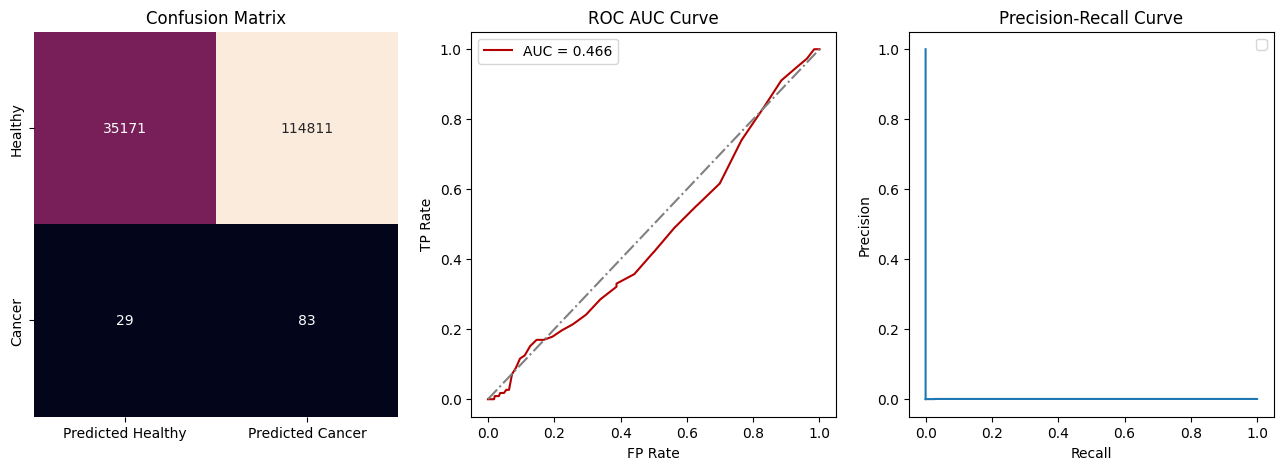

+---------------------------+---------+-----------+-----------+------------+-----------+-----------+-----------+-----------+
|                           |   count |      mean |       std |        min |       25% |       50% |       75% |       max |
|---------------------------+---------+-----------+-----------+------------+-----------+-----------+-----------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.03375   | 0.0159799 | 0.02       | 0.0233333 | 0.0233333 | 0.0458333 | 0.06      |
| cancer_in_next_1_years_-5 |      20 | 0.0335    | 0.0175211 | 0.0133333  | 0.0225    | 0.025     | 0.0441667 | 0.0766667 |
| cancer_in_next_1_years_-4 |      36 | 0.0362963 | 0.0225202 | 0.00666667 | 0.0225    | 0.03      | 0.0441667 | 0.1       |
| cancer_in_next_1_years_-3 |      51 | 0.0351986 | 0.0219822 | 0.00333333 | 0.02      | 0.03      | 0.045     | 0.1       |
| cancer_in_next_1_years_-2 |      75 | 0.0358017 | 0.0221526 | 0.00666667 | 0.02      | 0.03      | 0.0433333 | 0.1       |


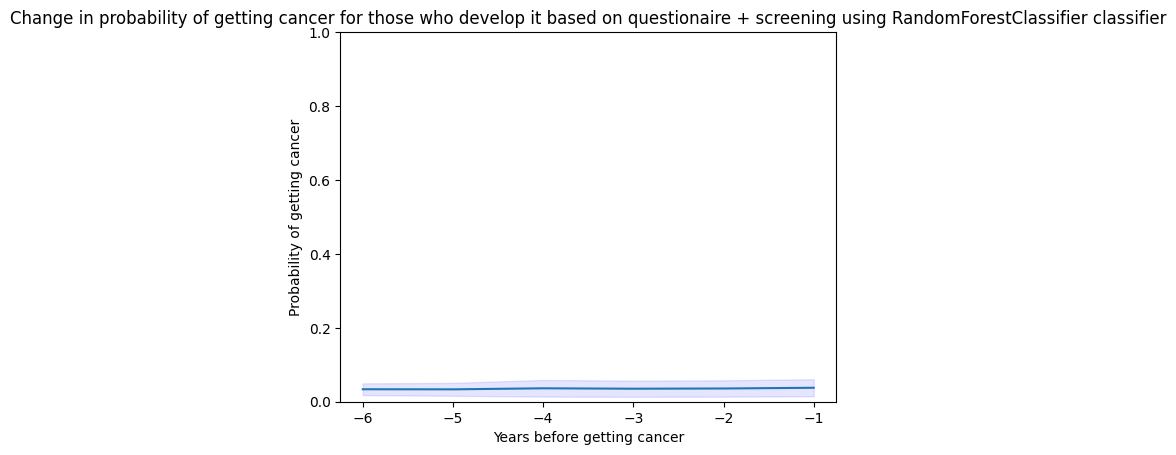

+---------------------------+---------+-----------+-----------+-------+-----------+-----------+-----------+----------+
|                           |   count |      mean |       std |   min |       25% |       50% |       75% |      max |
|---------------------------+---------+-----------+-----------+-------+-----------+-----------+-----------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.0386968 | 0.033999  |     0 | 0.02      | 0.0333333 | 0.05      | 0.790646 |
| cancer_in_next_1_years_-5 |   22319 | 0.0411715 | 0.0470518 |     0 | 0.02      | 0.0333333 | 0.05      | 0.796185 |
| cancer_in_next_1_years_-4 |   25070 | 0.0424288 | 0.0477646 |     0 | 0.0233333 | 0.0333333 | 0.05      | 0.796185 |
| cancer_in_next_1_years_-3 |   26219 | 0.043676  | 0.0491818 |     0 | 0.0233333 | 0.0366667 | 0.0533333 | 0.796185 |
| cancer_in_next_1_years_-2 |   24683 | 0.0442026 | 0.0494839 |     0 | 0.0233333 | 0.0366667 | 0.0533333 | 0.796185 |
| cancer_in_next_1_years_-1 |   30552 | 0.046099

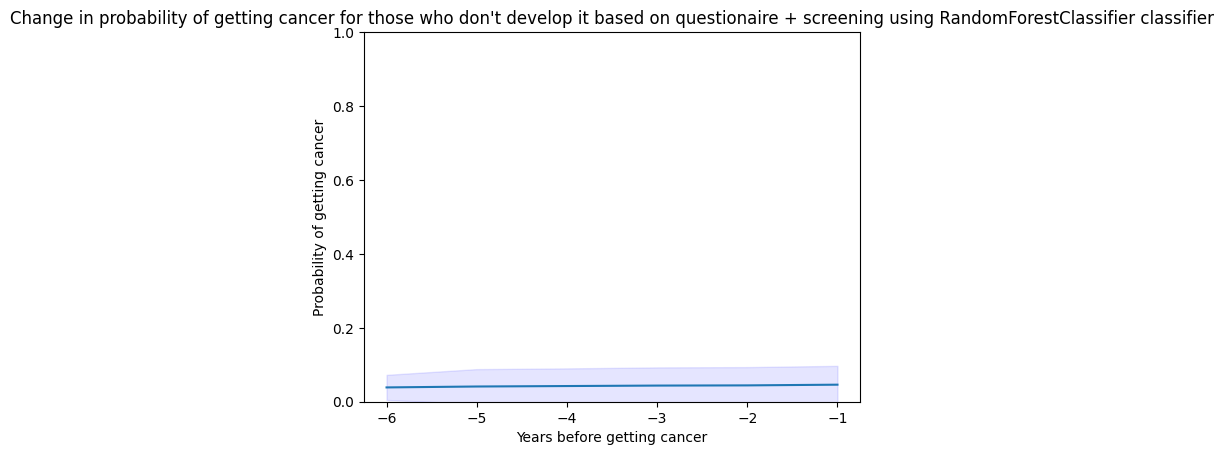

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |              1        |                nan |                nan |            nan           |
|  1 |   0.02      |              83 |           114811 

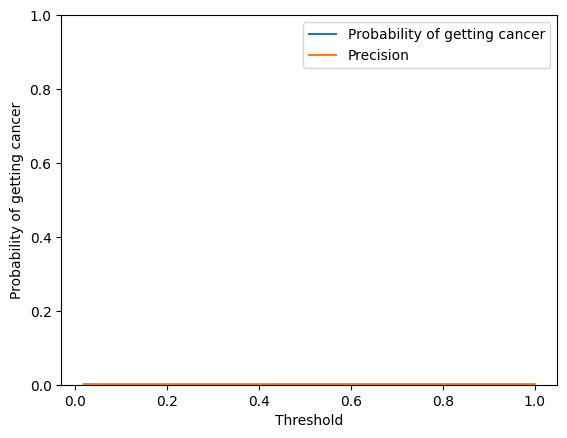



Cross-Validation measures:
+--------------------+------------+-------------+----------+-----------+
|                    |       mean |         std |      min |       max |
|--------------------+------------+-------------+----------+-----------|
| precision__class_0 | 0.992138   | 0.00134993  | 0.989419 | 0.993837  |
| recall__class_0    | 0.999887   | 0.000117623 | 0.999606 | 1         |
| f1-score__class_0  | 0.995997   | 0.000692542 | 0.994584 | 0.996909  |
| precision__class_1 | 0.2        | 0.322441    | 0        | 1         |
| recall__class_1    | 0.00642681 | 0.0107289   | 0        | 0.0307692 |
| f1-score__class_1  | 0.0123664  | 0.0205208   | 0        | 0.0588235 |
| accuracy           | 0.992027   | 0.00137347  | 0.989227 | 0.993838  |
| auc                | 0.581595   | 0.0451793   | 0.506848 | 0.653571  |
+--------------------+------------+-------------+----------+-----------+
_for_experiment_participants_all_RandomForestClassifier_ovar_cancer__15_trials
[-0.0001, 0.0433

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


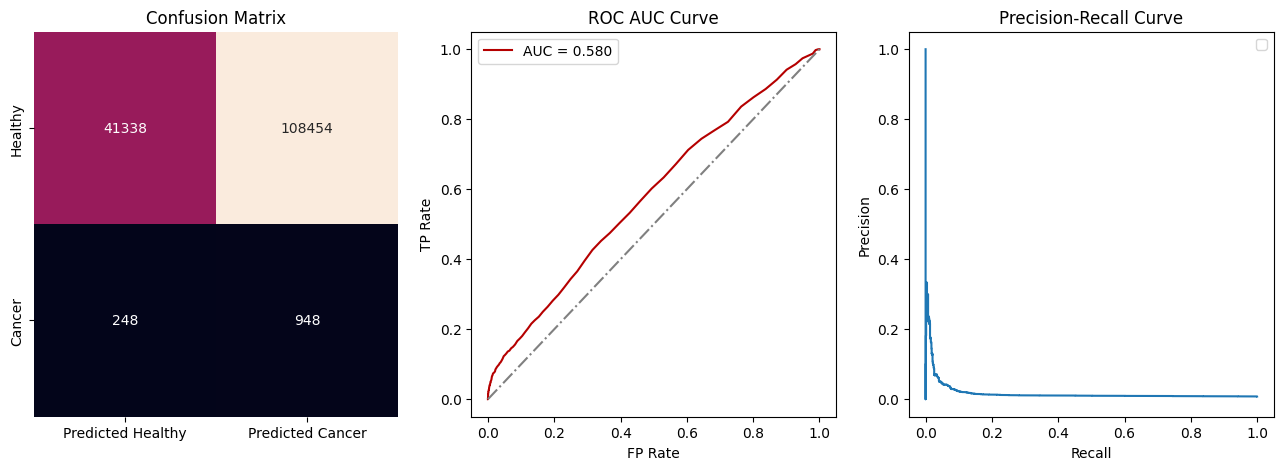

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |            1196 |           149792 |               0 |                0 |  0.00792116 | 1        |             1        |              1        |                nan |                nan |             nan          |
|  1 |   0.0433333 |             948 |           108454 

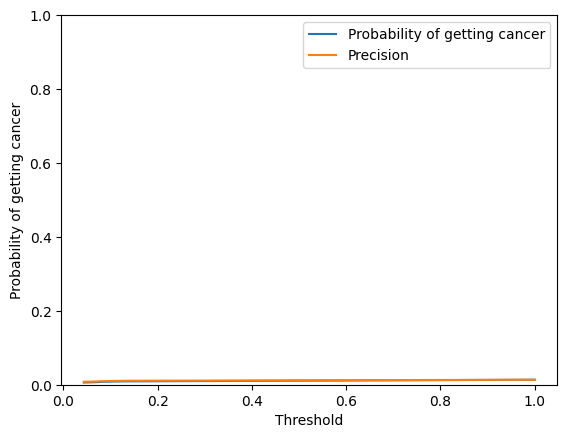



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.999361 | 0.000268107 | 0.998817 | 0.999697 |
| recall__class_0    | 0.999687 | 0.000254479 | 0.9992   | 1        |
| f1-score__class_0  | 0.999524 | 0.000162187 | 0.999245 | 0.999706 |
| precision__class_1 | 0.391852 | 0.381436    | 0        | 1        |
| recall__class_1    | 0.150424 | 0.14076     | 0        | 0.428571 |
| f1-score__class_1  | 0.186484 | 0.164413    | 0        | 0.5      |
| accuracy           | 0.999049 | 0.000324055 | 0.998492 | 0.999412 |
| auc                | 0.905384 | 0.0773193   | 0.746787 | 0.996541 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_participants_all_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0.016666666666666666, 0.1666666

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


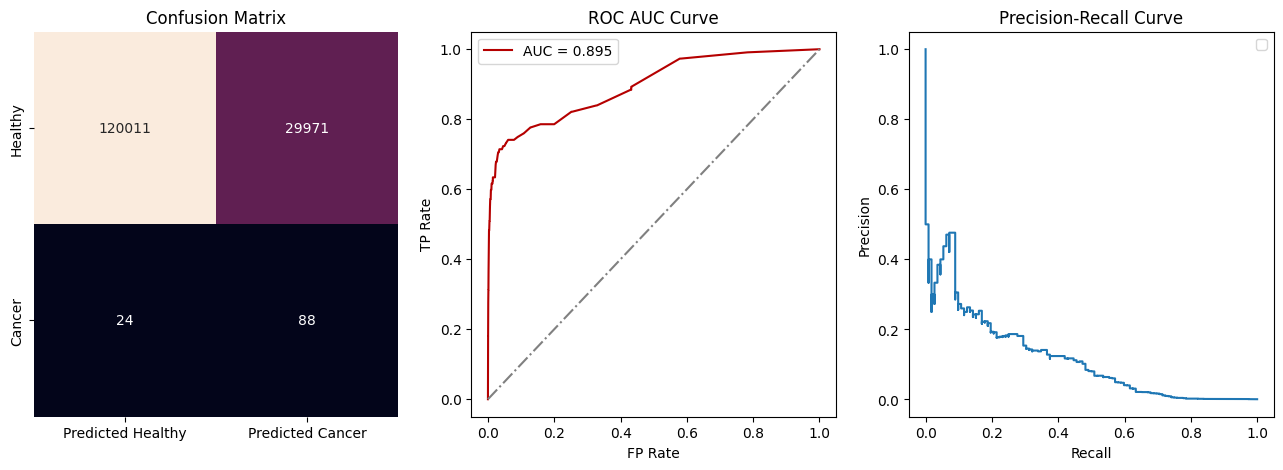

+---------------------------+---------+-----------+------------+-------+------------+------------+-----------+-----------+
|                           |   count |      mean |        std |   min |        25% |        50% |       75% |       max |
|---------------------------+---------+-----------+------------+-------+------------+------------+-----------+-----------|
| cancer_in_next_1_years_-6 |       8 | 0.0108333 | 0.00938591 |     0 | 0.005      | 0.01       | 0.015     | 0.0266667 |
| cancer_in_next_1_years_-5 |      20 | 0.0115    | 0.0176209  |     0 | 0.0025     | 0.00666667 | 0.01      | 0.0633333 |
| cancer_in_next_1_years_-4 |      36 | 0.0278638 | 0.057646   |     0 | 0.00333333 | 0.00666667 | 0.0175    | 0.25      |
| cancer_in_next_1_years_-3 |      51 | 0.0330691 | 0.0670957  |     0 | 0.00666667 | 0.0132576  | 0.025     | 0.413333  |
| cancer_in_next_1_years_-2 |      75 | 0.0555525 | 0.105697   |     0 | 0.00666667 | 0.0133333  | 0.0433333 | 0.603333  |
| cancer_in_next

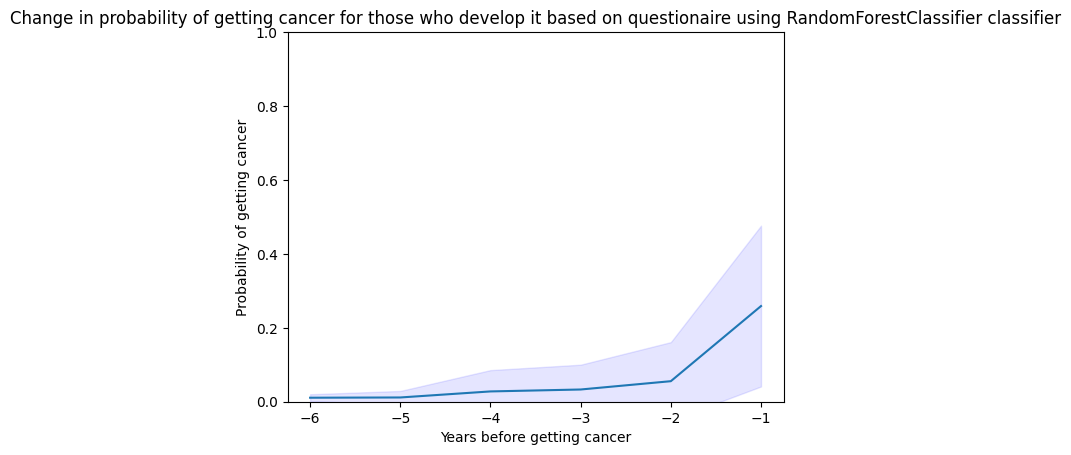

+---------------------------+---------+-----------+-----------+-------+------------+------------+-----------+----------+
|                           |   count |      mean |       std |   min |        25% |        50% |       75% |      max |
|---------------------------+---------+-----------+-----------+-------+------------+------------+-----------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.0124413 | 0.0285488 |     0 | 0          | 0.00666667 | 0.0133333 | 0.73     |
| cancer_in_next_1_years_-5 |   22319 | 0.0124959 | 0.0279454 |     0 | 0          | 0.00666667 | 0.0133333 | 0.75     |
| cancer_in_next_1_years_-4 |   25070 | 0.0128919 | 0.0274555 |     0 | 0.00333333 | 0.00666667 | 0.0133333 | 0.77     |
| cancer_in_next_1_years_-3 |   26219 | 0.0142815 | 0.0319152 |     0 | 0.00333333 | 0.00666667 | 0.0133333 | 0.626667 |
| cancer_in_next_1_years_-2 |   24683 | 0.0156775 | 0.0309989 |     0 | 0.00333333 | 0.00666667 | 0.0166667 | 0.756667 |
| cancer_in_next_1_years_-1 |   

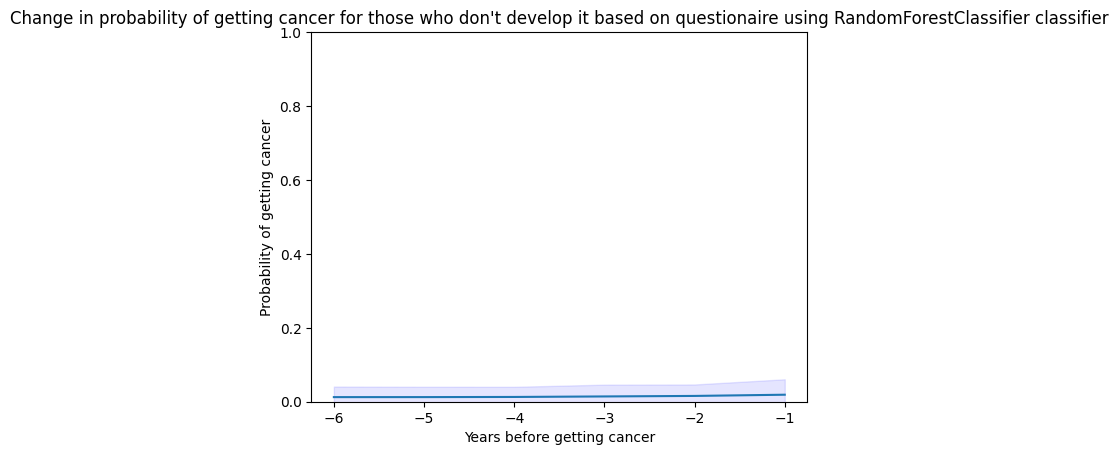

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 |  -0.0001    |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |   0.0166667 |              88 |            29971 

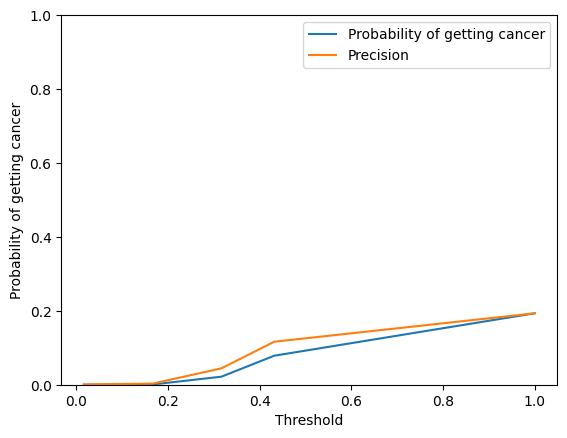



Cross-Validation measures:
+--------------------+----------+-------------+----------+----------+
|                    |     mean |         std |      min |      max |
|--------------------+----------+-------------+----------+----------|
| precision__class_0 | 0.99934  | 0.000252158 | 0.998912 | 0.999802 |
| recall__class_0    | 0.999786 | 0.000164676 | 0.999494 | 1        |
| f1-score__class_0  | 0.999563 | 0.000134573 | 0.999292 | 0.999851 |
| precision__class_1 | 0.29     | 0.381351    | 0        | 1        |
| recall__class_1    | 0.106363 | 0.144284    | 0        | 0.428571 |
| f1-score__class_1  | 0.144259 | 0.186246    | 0        | 0.5      |
| accuracy           | 0.999127 | 0.000268934 | 0.998586 | 0.999703 |
| auc                | 0.866453 | 0.106366    | 0.660525 | 0.999207 |
+--------------------+----------+-------------+----------+----------+
_for_experiment_participants_screened_first_5_ca125_and_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0.0001, 0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


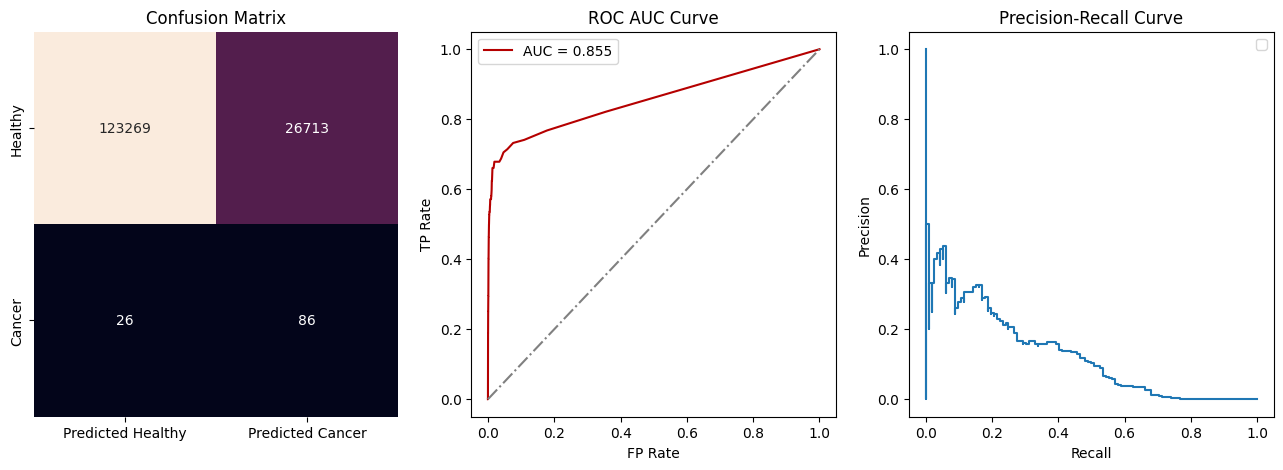

+---------------------------+---------+-------------+------------+-------+------------+----------+-------------+------------+
|                           |   count |        mean |        std |   min |        25% |      50% |         75% |        max |
|---------------------------+---------+-------------+------------+-------+------------+----------+-------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.000833333 | 0.00154303 |     0 | 0          | 0        | 0.000833333 | 0.00333333 |
| cancer_in_next_1_years_-5 |      20 | 0.00766667  | 0.0208335  |     0 | 0          | 0        | 0.00166667  | 0.09       |
| cancer_in_next_1_years_-4 |      36 | 0.0128704   | 0.0364378  |     0 | 0          | 0        | 0.00333333  | 0.176667   |
| cancer_in_next_1_years_-3 |      51 | 0.0162092   | 0.049688   |     0 | 0          | 0        | 0.00666667  | 0.303333   |
| cancer_in_next_1_years_-2 |      75 | 0.0299111   | 0.084805   |     0 | 0          | 0        | 0.0116667   | 0.533

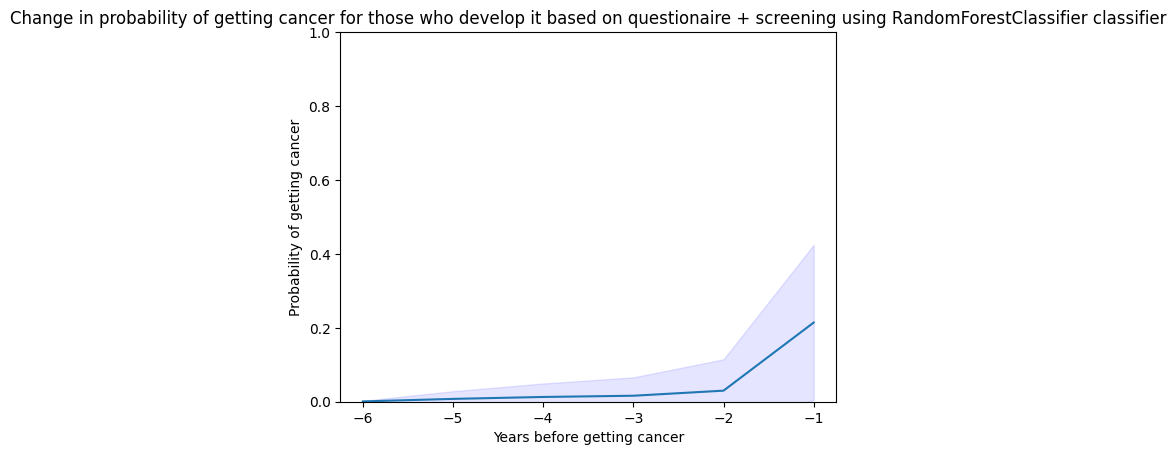

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00415386 | 0.018024  |     0 |     0 |     0 | 0.00333333 | 0.626667 |
| cancer_in_next_1_years_-5 |   22319 | 0.0041017  | 0.0172479 |     0 |     0 |     0 | 0.00333333 | 0.576667 |
| cancer_in_next_1_years_-4 |   25070 | 0.00421495 | 0.016958  |     0 |     0 |     0 | 0.00333333 | 0.616667 |
| cancer_in_next_1_years_-3 |   26219 | 0.00487657 | 0.02051   |     0 |     0 |     0 | 0.00333333 | 0.536667 |
| cancer_in_next_1_years_-2 |   24683 | 0.00478607 | 0.0202825 |     0 |     0 |     0 | 0.00333333 | 0.696667 |
| cancer_in_next_1_years_-1 |   30552 | 0.00682282 | 0.0308348 |     0 |     0 |     0 | 0.00333

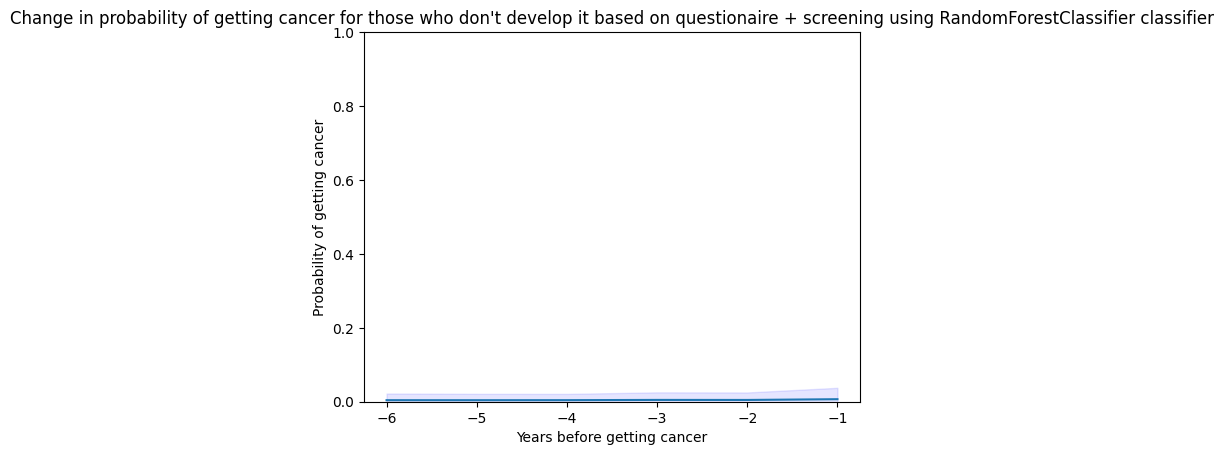

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 | -0.0001     |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |  0.00333333 |              86 |            26713 

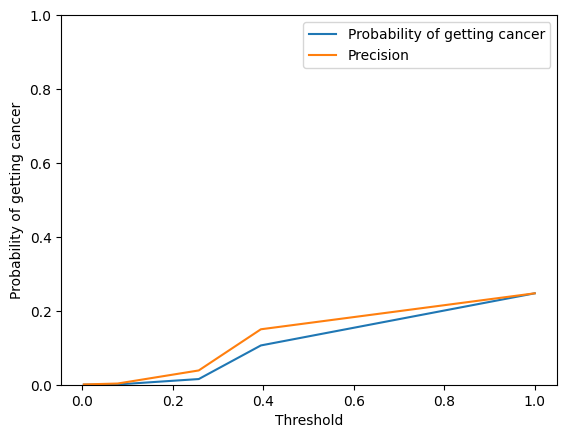



Cross-Validation measures:
+--------------------+-----------+-------------+----------+----------+
|                    |      mean |         std |      min |      max |
|--------------------+-----------+-------------+----------+----------|
| precision__class_0 | 0.999327  | 0.000230396 | 0.998911 | 0.999802 |
| recall__class_0    | 0.99984   | 0.000135319 | 0.9996   | 1        |
| f1-score__class_0  | 0.999583  | 0.00012749  | 0.999356 | 0.999901 |
| precision__class_1 | 0.287778  | 0.370781    | 0        | 1        |
| recall__class_1    | 0.0841107 | 0.105241    | 0        | 0.307692 |
| f1-score__class_1  | 0.121233  | 0.1453      | 0        | 0.421053 |
| accuracy           | 0.999167  | 0.000254762 | 0.998714 | 0.999802 |
| auc                | 0.866652  | 0.117707    | 0.60519  | 0.998093 |
+--------------------+-----------+-------------+----------+----------+
_for_experiment_participants_screened_first_5_ca125_binary_RandomForestClassifier_cancer_in_next_1_years__15_trials
[-0

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


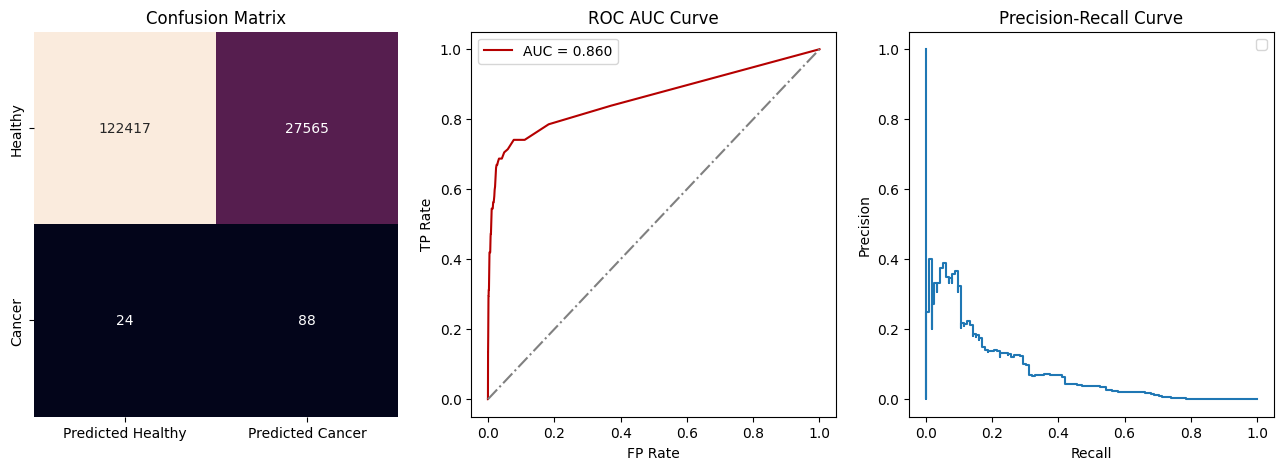

+---------------------------+---------+-------------+------------+-------+------------+------------+------------+------------+
|                           |   count |        mean |        std |   min |        25% |        50% |        75% |        max |
|---------------------------+---------+-------------+------------+-------+------------+------------+------------+------------|
| cancer_in_next_1_years_-6 |       8 | 0.000833333 | 0.00235702 |     0 | 0          | 0          | 0          | 0.00666667 |
| cancer_in_next_1_years_-5 |      20 | 0.00716667  | 0.0214742  |     0 | 0          | 0          | 0.00333333 | 0.0966667  |
| cancer_in_next_1_years_-4 |      36 | 0.0161111   | 0.052047   |     0 | 0          | 0          | 0.0075     | 0.266667   |
| cancer_in_next_1_years_-3 |      51 | 0.0191503   | 0.0604863  |     0 | 0          | 0          | 0.00666667 | 0.333333   |
| cancer_in_next_1_years_-2 |      75 | 0.0230222   | 0.067317   |     0 | 0          | 0.00333333 | 0.00666667

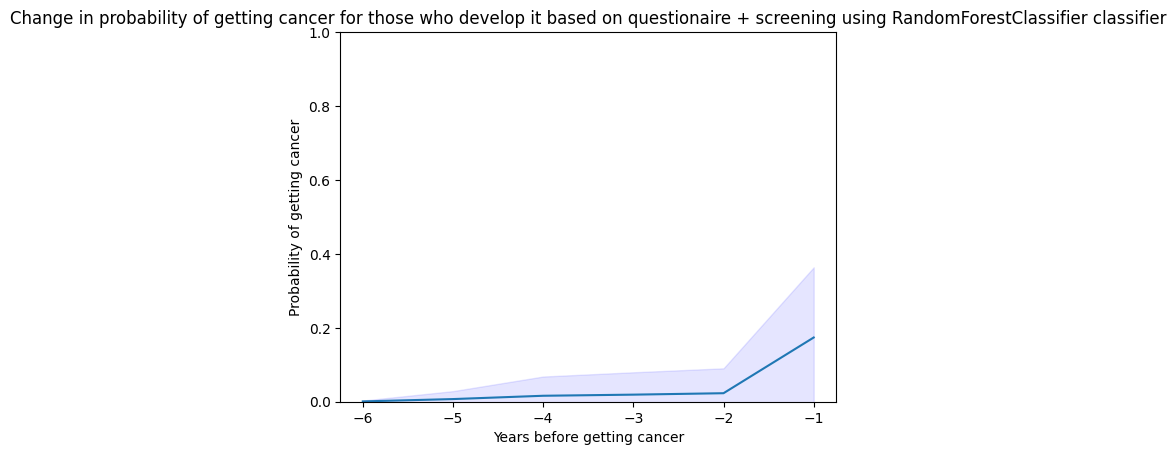

+---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------+
|                           |   count |       mean |       std |   min |   25% |   50% |        75% |      max |
|---------------------------+---------+------------+-----------+-------+-------+-------+------------+----------|
| cancer_in_next_1_years_-6 |   20949 | 0.00465569 | 0.0205398 |     0 |     0 |     0 | 0.00333333 | 0.66     |
| cancer_in_next_1_years_-5 |   22319 | 0.00470131 | 0.020557  |     0 |     0 |     0 | 0.00333333 | 0.613333 |
| cancer_in_next_1_years_-4 |   25070 | 0.00481258 | 0.019632  |     0 |     0 |     0 | 0.00333333 | 0.473333 |
| cancer_in_next_1_years_-3 |   26219 | 0.00534794 | 0.0216839 |     0 |     0 |     0 | 0.00333333 | 0.506667 |
| cancer_in_next_1_years_-2 |   24683 | 0.00524491 | 0.0215163 |     0 |     0 |     0 | 0.00333333 | 0.576667 |
| cancer_in_next_1_years_-1 |   30552 | 0.00719295 | 0.0305602 |     0 |     0 |     0 | 0.00333

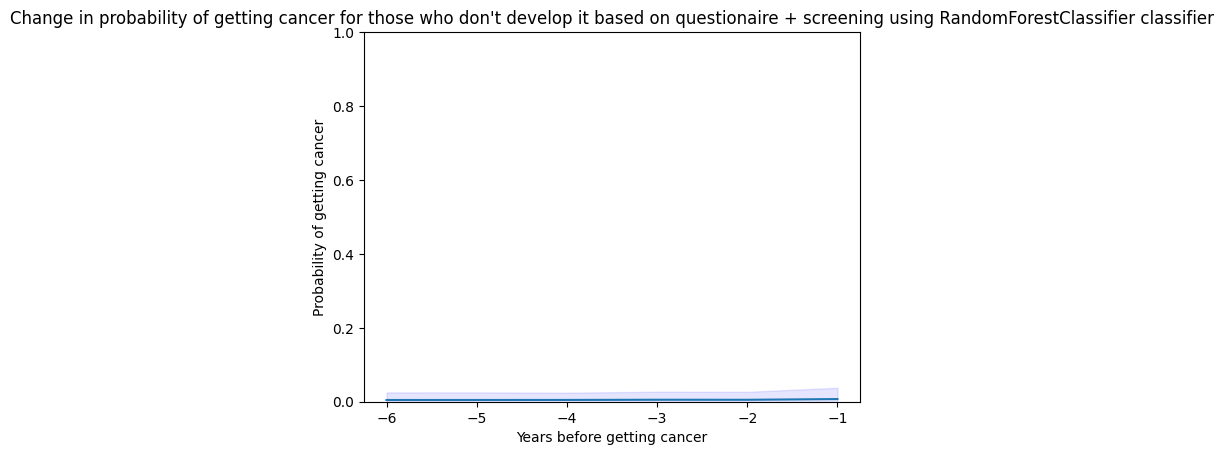

+----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------+
|    |   Threshold |   True_Positive |   False_Positive |   True_Negative |   False_Negative |   Precision |   Recall |   True_Positive_Rate |   False_Positive_Rate |   bucket_positives |   bucket_negatives |   per_bucket_probability |
|----+-------------+-----------------+------------------+-----------------+------------------+-------------+----------+----------------------+-----------------------+--------------------+--------------------+--------------------------|
|  0 | -0.0001     |             112 |           149982 |               0 |                0 | 0.000746199 | 1        |             1        |           1           |                nan |                nan |            nan           |
|  1 |  0.00333333 |              88 |            27565 

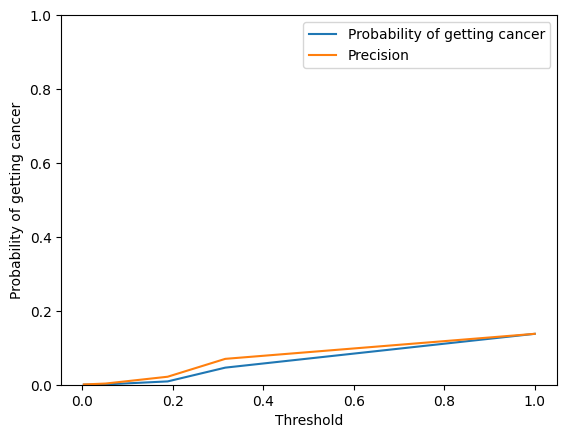

In [6]:
for filesuffix, cv_analytics_util in cv_analytics_utils.items():
    # Store CV Results
    cv_analytics_util.store_cv_results()

    # Defining labels
    print(filesuffix)
    label = cv_analytics_util.get_label()
    classifier_name = cv_analytics_util.get_classifier_type()
    based_on = 'questionaire'
    if 'screened' in filesuffix:
        based_on += ' + screening'

    
    # Predicting actual cancer probability using bucketing
    per_thereshold_metrics = bucket_predictions_by_thresholds(cv_analytics_util)

    # General Plots
    # threshold = cv_analytics_util.get_optimal_operating_point()
    threshold = per_thereshold_metrics.loc[1, 'Threshold']
    print(f"Threshold: {threshold}")
    cv_analytics_util.update_thresholds(threshold)
    cv_analytics_util.get_cv_report();
    cv_analytics_util.display_graph()
    
    # Change in cancer probability over years
    full_dataset = cv_analytics_util.get_dataset_with_predictions()
    full_dataset_cancer = extract_full_dataset_filter_cancer(full_dataset)
    full_dataset_no_cancer = extract_full_dataset_filter_no_cancer(full_dataset)

    title_caner = f'Change in probability of getting cancer for those who develop it based on {based_on} using {classifier_name} classifier'
    title_no_caner = f'Change in probability of getting cancer for those who don\'t develop it based on {based_on} using {classifier_name} classifier'

    if label == 'cancer_in_next_1_years':
        plot_change_in_confidence(full_dataset_cancer, title=title_caner, label=label)
        plt.show()
        plot_change_in_confidence(full_dataset_no_cancer, title=title_no_caner, label=label)
        plt.show()

    # Predicting actual cancer probability using bucketing
    print_df(per_thereshold_metrics)
    plot_threhold_probabilities(per_thereshold_metrics)
    plt.show()